# **Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report**

The focus is readability and clarity.



The following must be answered:

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

## **ABSTRACT**

The objective was to understand the dataset and develop a reliable model for accurately predicting media campaign costs in US food marts. Acknowledging the multifaceted nature of factors impacting these costs, linear regression was employed to create a predictive model. By identifying key determinants and applying the model to real campaign data, its effectiveness was evaluated. Although the analysis demonstrated potential, there remains room for improvement. Also,SHAP analysis performed on the interpreted models for the dataset. To figure out what are the most significant features to predict the media campaign costs in US food marts.

In [1]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=9407d9cbbcbb4460fa7b99a02b04b39b1be48dc7a13e1ad12224dceed7ff4c52
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

## **DATASET**

### Reading the dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/polampellys/INFO6105_DataScienceEngineeringMethods_SPRING2024/main/media_prediction_and_its_costV1.csv")

### Checking datatypes

In [4]:
data.dtypes

food_category                object
food_department              object
food_family                  object
store_sales(in millions)    float64
store_cost(in millions)     float64
unit_sales(in millions)       int64
promotion_name               object
sales_country                object
gender                       object
total_children                int64
member_card                  object
occupation                   object
houseowner                   object
avg. yearly_income           object
brand_name                   object
SRP                         float64
gross_weight                float64
net_weight                  float64
recyclable_package            int64
low_fat                       int64
units_per_case                int64
store_type                   object
store_state                  object
store_sqft                    int64
grocery_sqft                  int64
frozen_sqft                   int64
meat_sqft                     int64
coffee_bar                  

In [5]:
data.shape

(4999, 34)

In [6]:
data.head()

food_category food_department food_family  store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                      7.36   
1  Breakfast Foods    Frozen Foods        Food                      5.52   
2  Breakfast Foods    Frozen Foods        Food                      3.68   
3  Breakfast Foods    Frozen Foods        Food                      3.68   
4  Breakfast Foods    Frozen Foods        Food                      4.08   

   store_cost(in millions)  unit_sales(in millions)         promotion_name  \
0                   2.7232                        4           Bag Stuffers   
1                   2.5944                        3  Cash Register Lottery   
2                   1.3616                        2    High Roller Savings   
3                   1.1776                        2  Cash Register Lottery   
4                   1.4280                        3       Double Down Sale   

  sales_country gender  total_children  ... grocery_sqft frozen_sqft  \
0           USA      F               1  ...        18670        5415   
1           USA      M               0  ...        18670        5415   
2           USA      F               4  ...        18670        5415   
3           USA      F               2  ...        18670        5415   
4           USA      M               0  ...        18670        5415   

  meat_sqft coffee_bar video_store  salad_bar  prepared_food  florist  \
0      3610        1.0           1        1.0              1        1   
1      3610        1.0           1        1.0              1        1   
2      3610        1.0           1        1.0              1        1   
3      3610        1.0           1        1.0              1        1   
4      3610        1.0           1        1.0              1        1   

           media_type    cost  
0  Daily Paper, Radio  126.62  
1  Daily Paper, Radio   59.86  
2  Daily Paper, Radio   84.16  
3     In-Store Coupon   95.78  
4               Radio   50.79  

[5 rows x 34 columns]

In [7]:
data.isnull().sum()

food_category                0
food_department              0
food_family                  0
store_sales(in millions)     0
store_cost(in millions)      0
unit_sales(in millions)      0
promotion_name               0
sales_country                0
gender                       0
total_children               0
member_card                  0
occupation                   0
houseowner                   0
avg. yearly_income           0
brand_name                   0
SRP                          0
gross_weight                 0
net_weight                   0
recyclable_package           0
low_fat                      0
units_per_case               0
store_type                   0
store_state                  0
store_sqft                   0
grocery_sqft                 0
frozen_sqft                  0
meat_sqft                    0
coffee_bar                  25
video_store                  0
salad_bar                   26
prepared_food                0
florist                      0
media_ty

###**Q. What are the data types? (Only numeric and categorical)**


There are total of 34 columns and 4999 rows. 20 Numerical Columns & 14 Categorical Columns.

Numerical :

[ "store_sales(in millions)", "store_cost(in millions)", "unit_sales(in millions)", "total_children", "SRP", "gross_weight", "net_weight", "recyclable_package","low_fat", "units_per_case", "store_sqft", "grocery_sqft", "frozen_sqft", "meat_sqft", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist","cost" ]

Categorical :

["food_category", "food_department", "food_family", "promotion_sale", "sales_country", "gender", "member_card", "occupation", "houseowner", "avg. yearly_income", "brand_name", "store_type", "store_state", "media_type"]

Target Variable (Dependent): "cost".

Predictor Variables (Independent): All other variables in the dataset.

There are missing values in coffee_bar and salad_bar

In [8]:
data.describe()

store_sales(in millions)  store_cost(in millions)  \
count               4999.000000              4999.000000   
mean                   6.691498                 2.679762   
std                    3.407244                 1.424444   
min                    0.780000                 0.249600   
25%                    4.080000                 1.588800   
50%                    5.980000                 2.462400   
75%                    8.840000                 3.540000   
max                   19.650000                 8.855000   

       unit_sales(in millions)  total_children          SRP  gross_weight  \
count              4999.000000     4999.000000  4999.000000   4999.000000   
mean                  3.107421        2.499100     2.151934     14.081786   
std                   0.813220        1.484328     0.903090      4.586098   
min                   1.000000        0.000000     0.510000      6.200000   
25%                   3.000000        1.000000     1.390000      9.800000   
50%                   3.000000        2.000000     2.170000     14.100000   
75%                   4.000000        4.000000     2.860000     17.800000   
max                   6.000000        5.000000     3.930000     21.900000   

        net_weight  recyclable_package      low_fat  units_per_case  \
count  4999.000000         4999.000000  4999.000000     4999.000000   
mean     12.095717            0.558112     0.491098       19.168434   
std       4.667759            0.496661     0.499971       10.090568   
min       4.260000            0.000000     0.000000        1.000000   
25%       7.770000            0.000000     0.000000       11.000000   
50%      12.100000            1.000000     0.000000       21.000000   
75%      15.700000            1.000000     1.000000       29.000000   
max      20.800000            1.000000     1.000000       36.000000   

         store_sqft  grocery_sqft  frozen_sqft    meat_sqft   coffee_bar  \
count   4999.000000   4999.000000  4999.000000  4999.000000  4974.000000   
mean   27389.127826  18741.964993  5188.363873  3458.865973     0.599719   
std     5350.589053   3922.022038  1420.294607   946.750369     0.490005   
min    20319.000000  13305.000000  2452.000000  1635.000000     0.000000   
25%    23593.000000  15337.000000  4746.000000  3164.000000     0.000000   
50%    27694.000000  18670.000000  5062.000000  3375.000000     1.000000   
75%    30797.000000  22063.000000  5633.000000  3755.000000     1.000000   
max    39696.000000  30351.000000  9184.000000  6122.000000     1.000000   

       video_store    salad_bar  prepared_food      florist         cost  
count  4999.000000  4973.000000    4999.000000  4999.000000  4999.000000  
mean      0.319064     0.547758       0.545309     0.552310    98.224389  
std       0.466160     0.497764       0.497993     0.497306    30.144914  
min       0.000000     0.000000       0.000000     0.000000    50.790000  
25%       0.000000     0.000000       0.000000     0.000000    69.630000  
50%       0.000000     1.000000       1.000000     1.000000    95.980000  
75%       1.000000     1.000000       1.000000     1.000000   126.240000  
max       1.000000     1.000000       1.000000     1.000000   149.750000

### OBSERVATIONS

- Store_Sales: Average 6.69 million with high variability (std 3.41 million).

- Store Cost: Average 2.68 million, also with high variability.

- Unit Sales: Average 3.11 million, less variable than dollar figures.

- Total Children: Average 2.5, indicating family demographic.

- SRP: Average 2.15, ranging from 0.51 to 3.93.

- Weights: Average gross weight 14.08, net weight 12.10, implying packaging weight.

- Store Size: Average 27,389 sqft, with considerable size range among stores.

- Grocery vs. Other Sections: Grocery sections are the largest on average compared to frozen and meat sections.

- Store Features: More than half have coffee bars, salad bars, and prepared food sections.

- Recyclable Packaging: 55.8% of products have recyclable packaging.

- Low Fat Options: 49.1% of products are marked as low fat.

- Inventory: Average 19.17 units per case, indicating stock volume.

- Space Utilization: Varying square footage allocated to different store sections.

- Optional Services: Presence of coffee bars, video stores, salad bars, prepared food, and florists varies significantly.


The dataset indicates diverse store performances with high variability in sales and costs, possibly leading to outliers, while unit sales are more uniformly distributed. Demographics and pricing strategies vary, as shown by the range in total children and SRP. Store sizes and layouts differ, and more than half the stores prioritize recyclable packaging and low-fat products, suggesting a balance between sustainability and health consciousness.

### **Q. Are there missing values?**


Yes there are missing values, in coffee_bar and salad_bar

### Removing the missing data using forward fill method

In [9]:
data = data.fillna(method = 'ffill')

In [10]:
data.isnull().sum()

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
gender                      0
total_children              0
member_card                 0
occupation                  0
houseowner                  0
avg. yearly_income          0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_store                 0
salad_bar                   0
prepared_food               0
florist                     0
media_type                  0
cost      

No missing Values

### Converting categorical data to numerical data

Converting the categorical data to numerical data using label encoder method where it indentifies the categorical data, and from which unique categories are identified. Then, it assign values starting from 0 to the indentified unique categories.

In [11]:
numerical_feats = data.select_dtypes(include='number').columns.tolist()
categorical_feats = data.select_dtypes(include='object').columns.tolist()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in categorical_feats:
    # Fit the label encoder to the dataframe column
    le.fit(data[column])
    # Replace the dataframe column with the encoded values
    data[column] = le.transform(data[column])

print(data)

      food_category  food_department  food_family  store_sales(in millions)  \
0                 2                3            0                      7.36   
1                 2                3            0                      5.52   
2                 2                3            0                      3.68   
3                 2                3            0                      3.68   
4                 2                3            0                      4.08   
...             ...              ...          ...                       ...   
4994              4                4            0                      8.16   
4995              4                4            0                      2.28   
4996              4                4            0                      2.62   
4997              4                4            0                      9.51   
4998              4                4            0                      7.86   

      store_cost(in millions)  unit_sales(in millio

### **Q. What are the likely distributions of the numeric variables?**

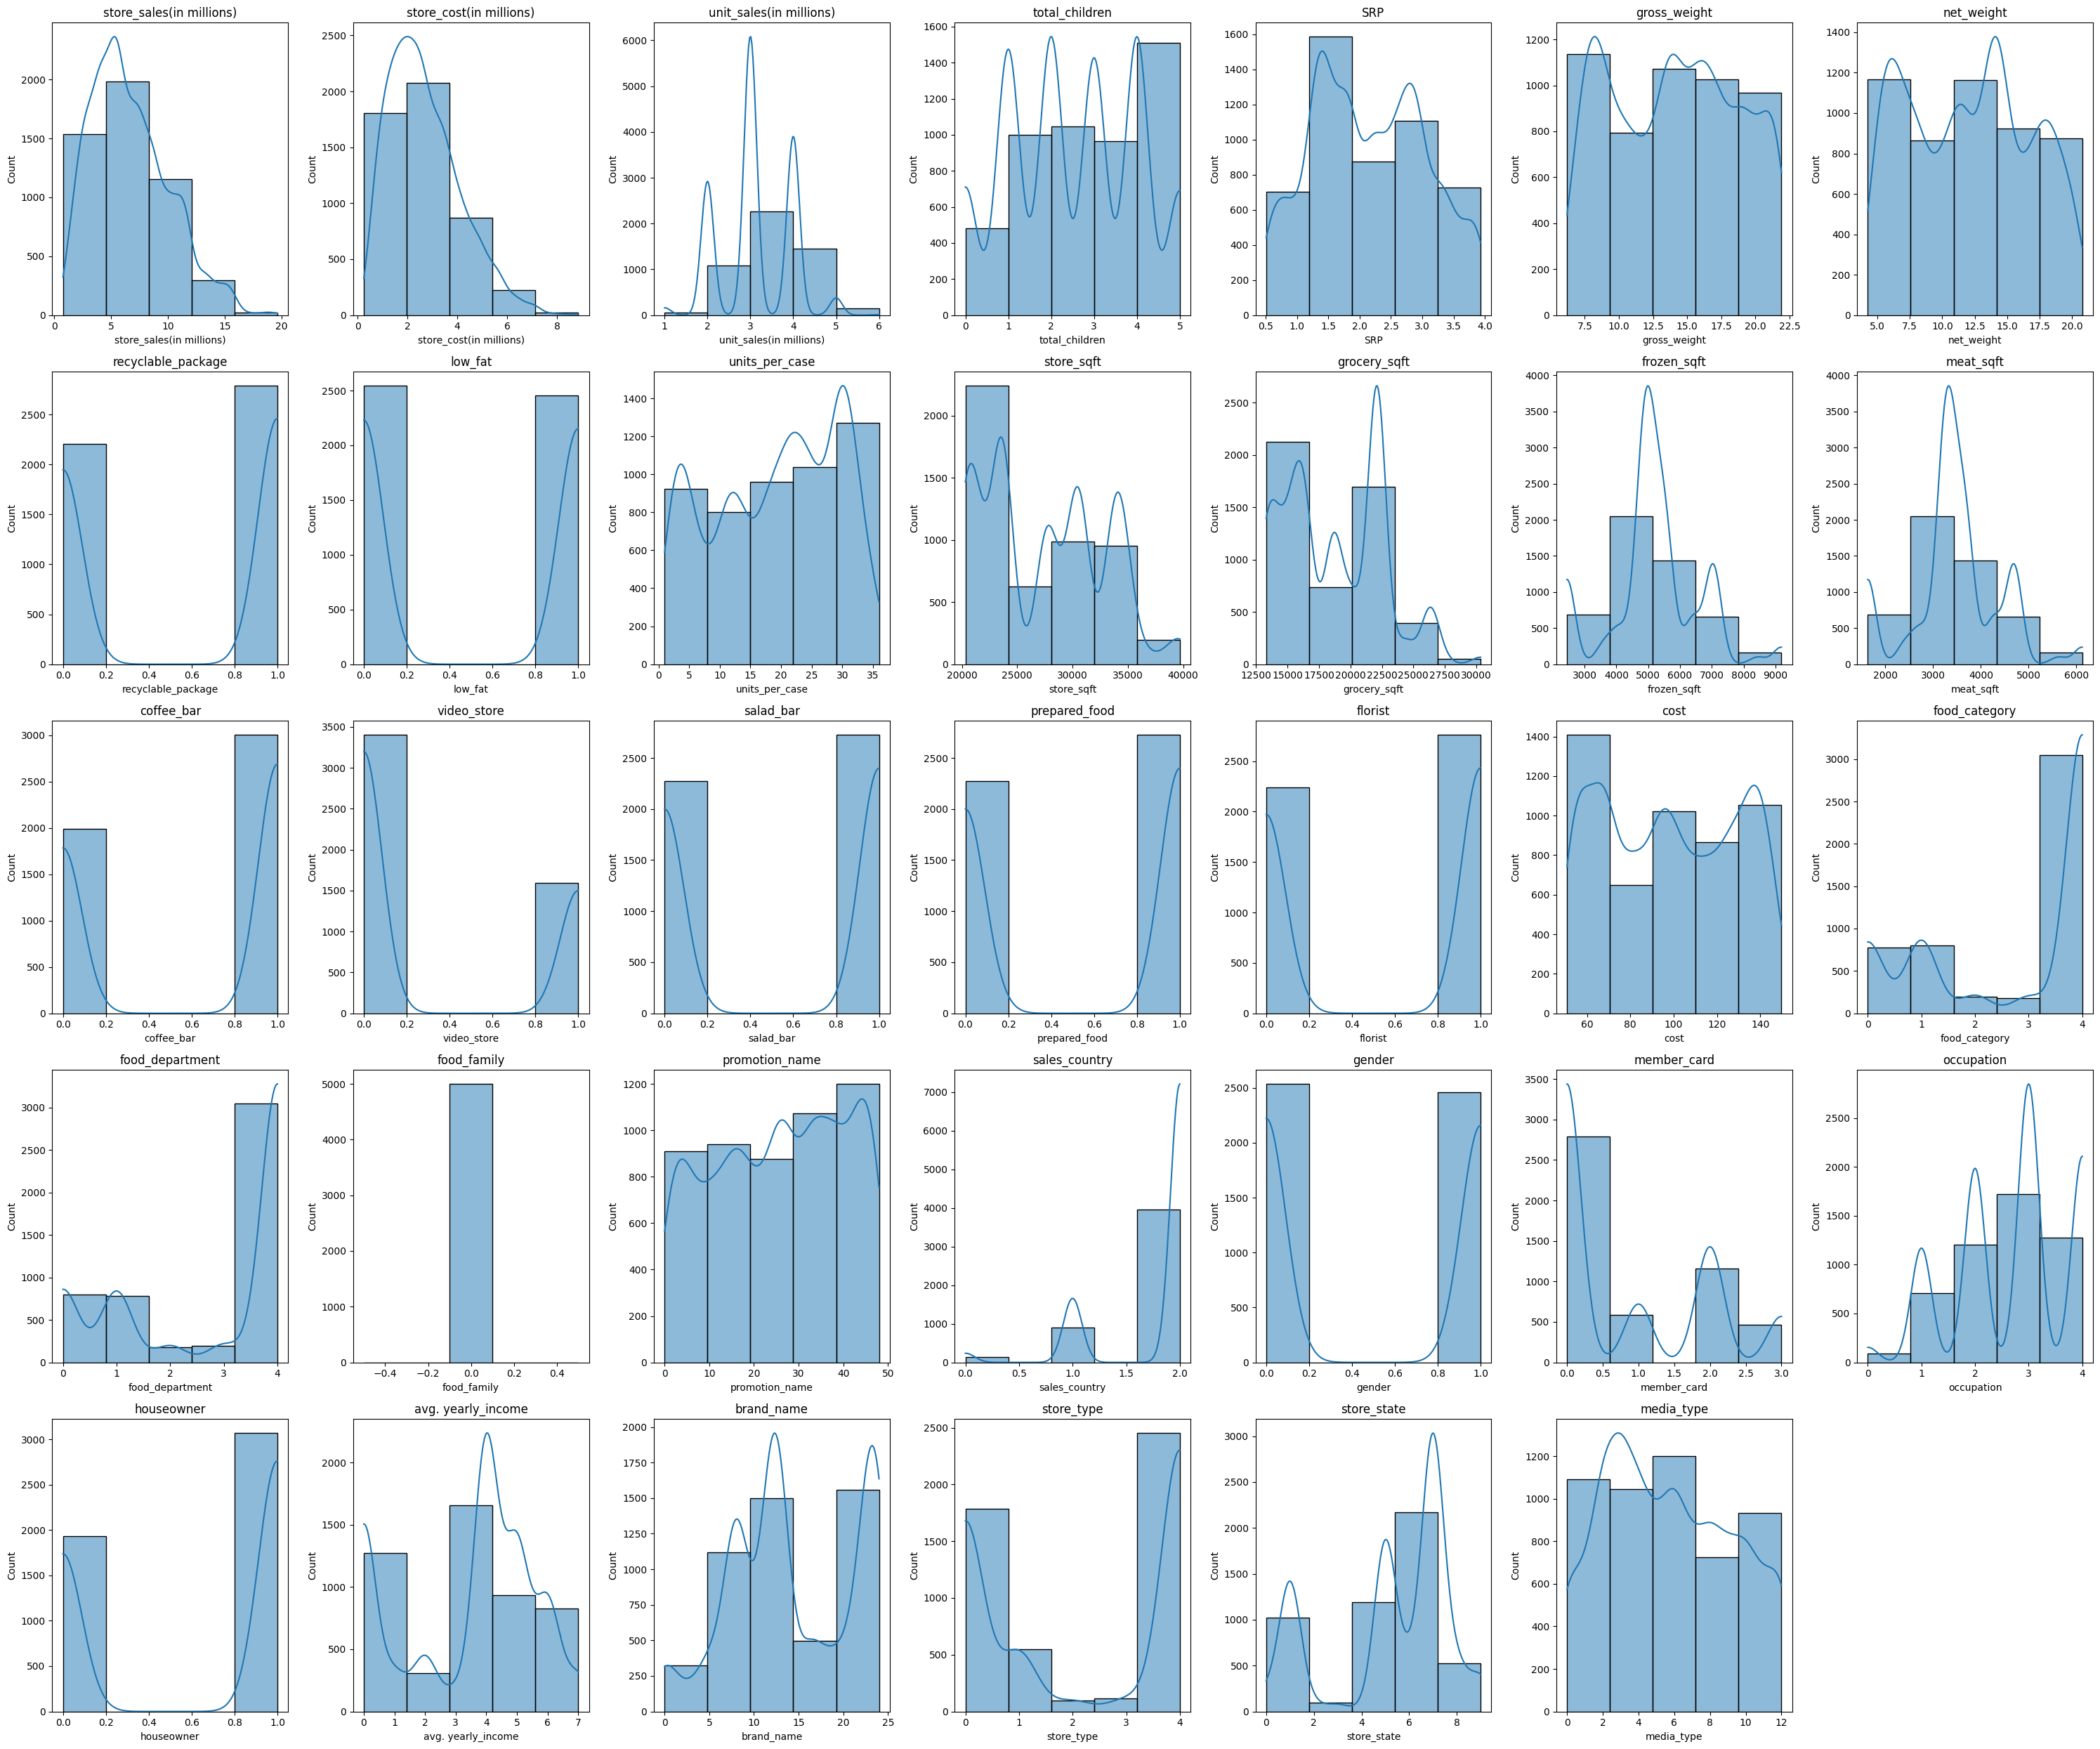

In [12]:
numerical_v1 = ["store_sales(in millions)", "store_cost(in millions)", "unit_sales(in millions)", "total_children", "SRP", "gross_weight", "net_weight", "recyclable_package","low_fat", "units_per_case", "store_sqft", "grocery_sqft", "frozen_sqft", "meat_sqft", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist","cost","food_category", "food_department", "food_family", "promotion_name", "sales_country", "gender", "member_card", "occupation", "houseowner", "avg. yearly_income", "brand_name", "store_type", "store_state", "media_type"]

plt.figure(figsize=(30, 25))
for i, col in enumerate(numerical_v1, 1):      #Loop for each column in the numerical variables to generate graph
    plt.subplot(5, 7, i)                # Grid 5 cols, 7 rows
    sns.histplot(data[col], kde=True, bins=5)     # adds kernal density estimate line and having 5 bins in the histogram
    plt.title(col)    # having the name of columns for each plot

plt.tight_layout() # consolidates and fits in the page
plt.show()

### Observation

Based on the graphs generated , few of them are closer to normal distribution like store_sales, store_cost, gross_weight etc., and other numeric varaibles like net_weight, meat_sqft, frozen_sqft has deviations and appears to be Multimodal with irregular peaks , and doesn't really come under any specific distribution

# Feature Scaling

### Checking the ranges of dependent and independent vaariables

<Axes: >

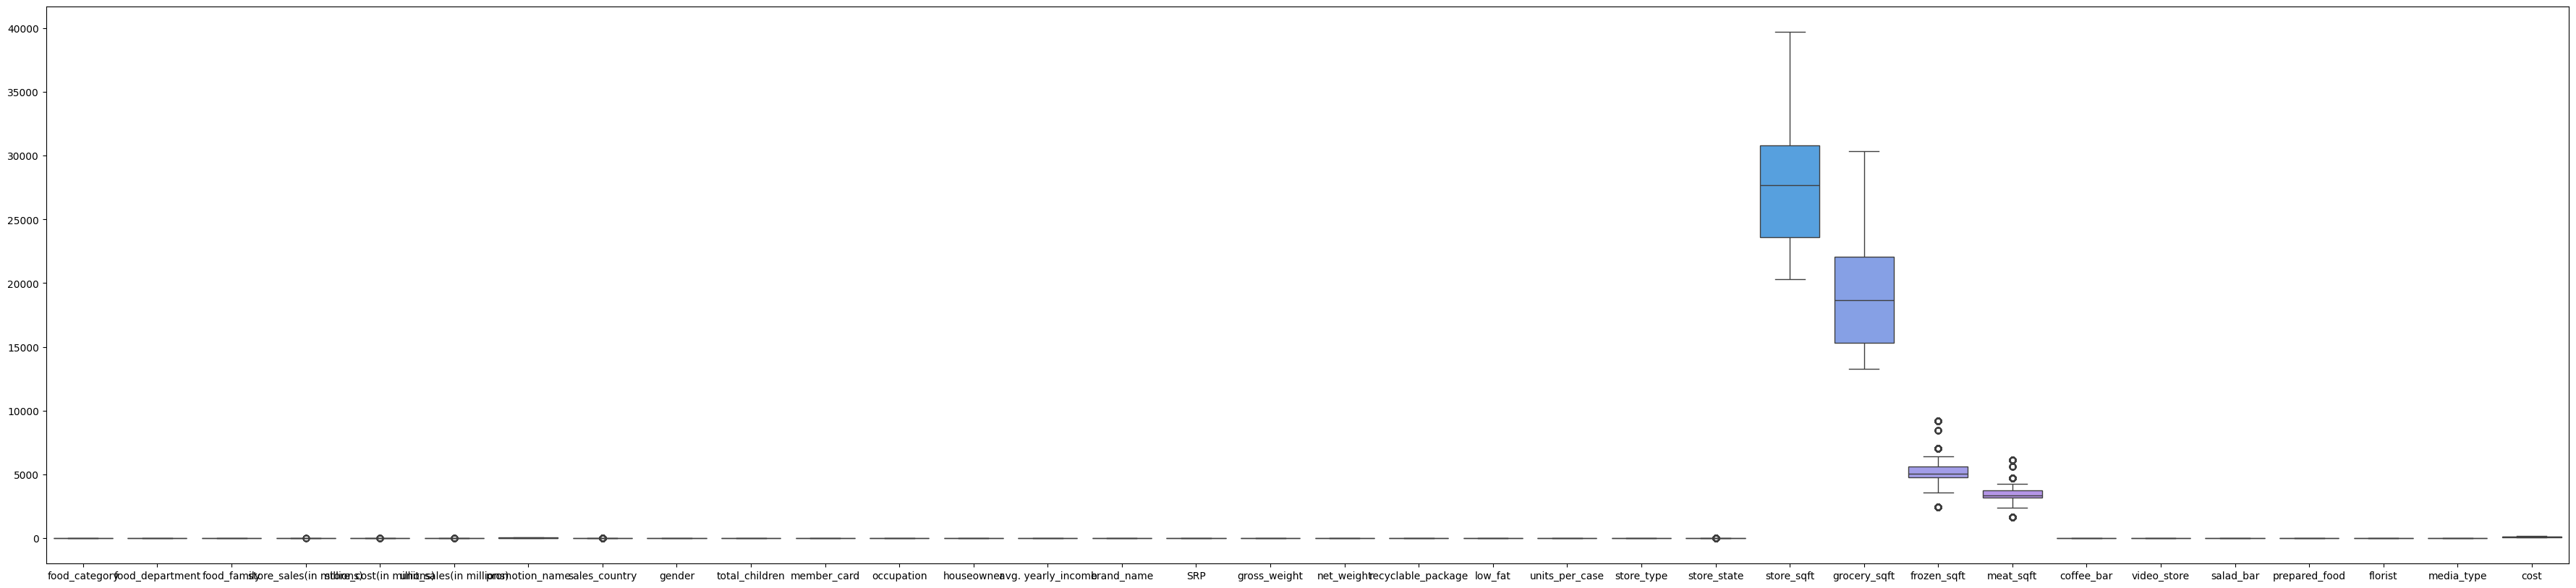

In [13]:
plt.figure(figsize=(45, 10))
plt.tight_layout()
sns.boxplot(data=data)

It's not very clear to visulaise this graph and depict the ranges of the varaibles. So for this we to normalise the data and genearate again. To normalise this, for that i'm using min-max method first to see the data.

In [14]:
#making a copy of this data, incase for future use
datac = data.copy()

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #Initialising the min-max
columns_to_normalize = ['store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft'] #coulumns that to be normalised
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
# "scaler.fit_transform" this is a method called by scaler object where is does both scaling the parameter and transform it

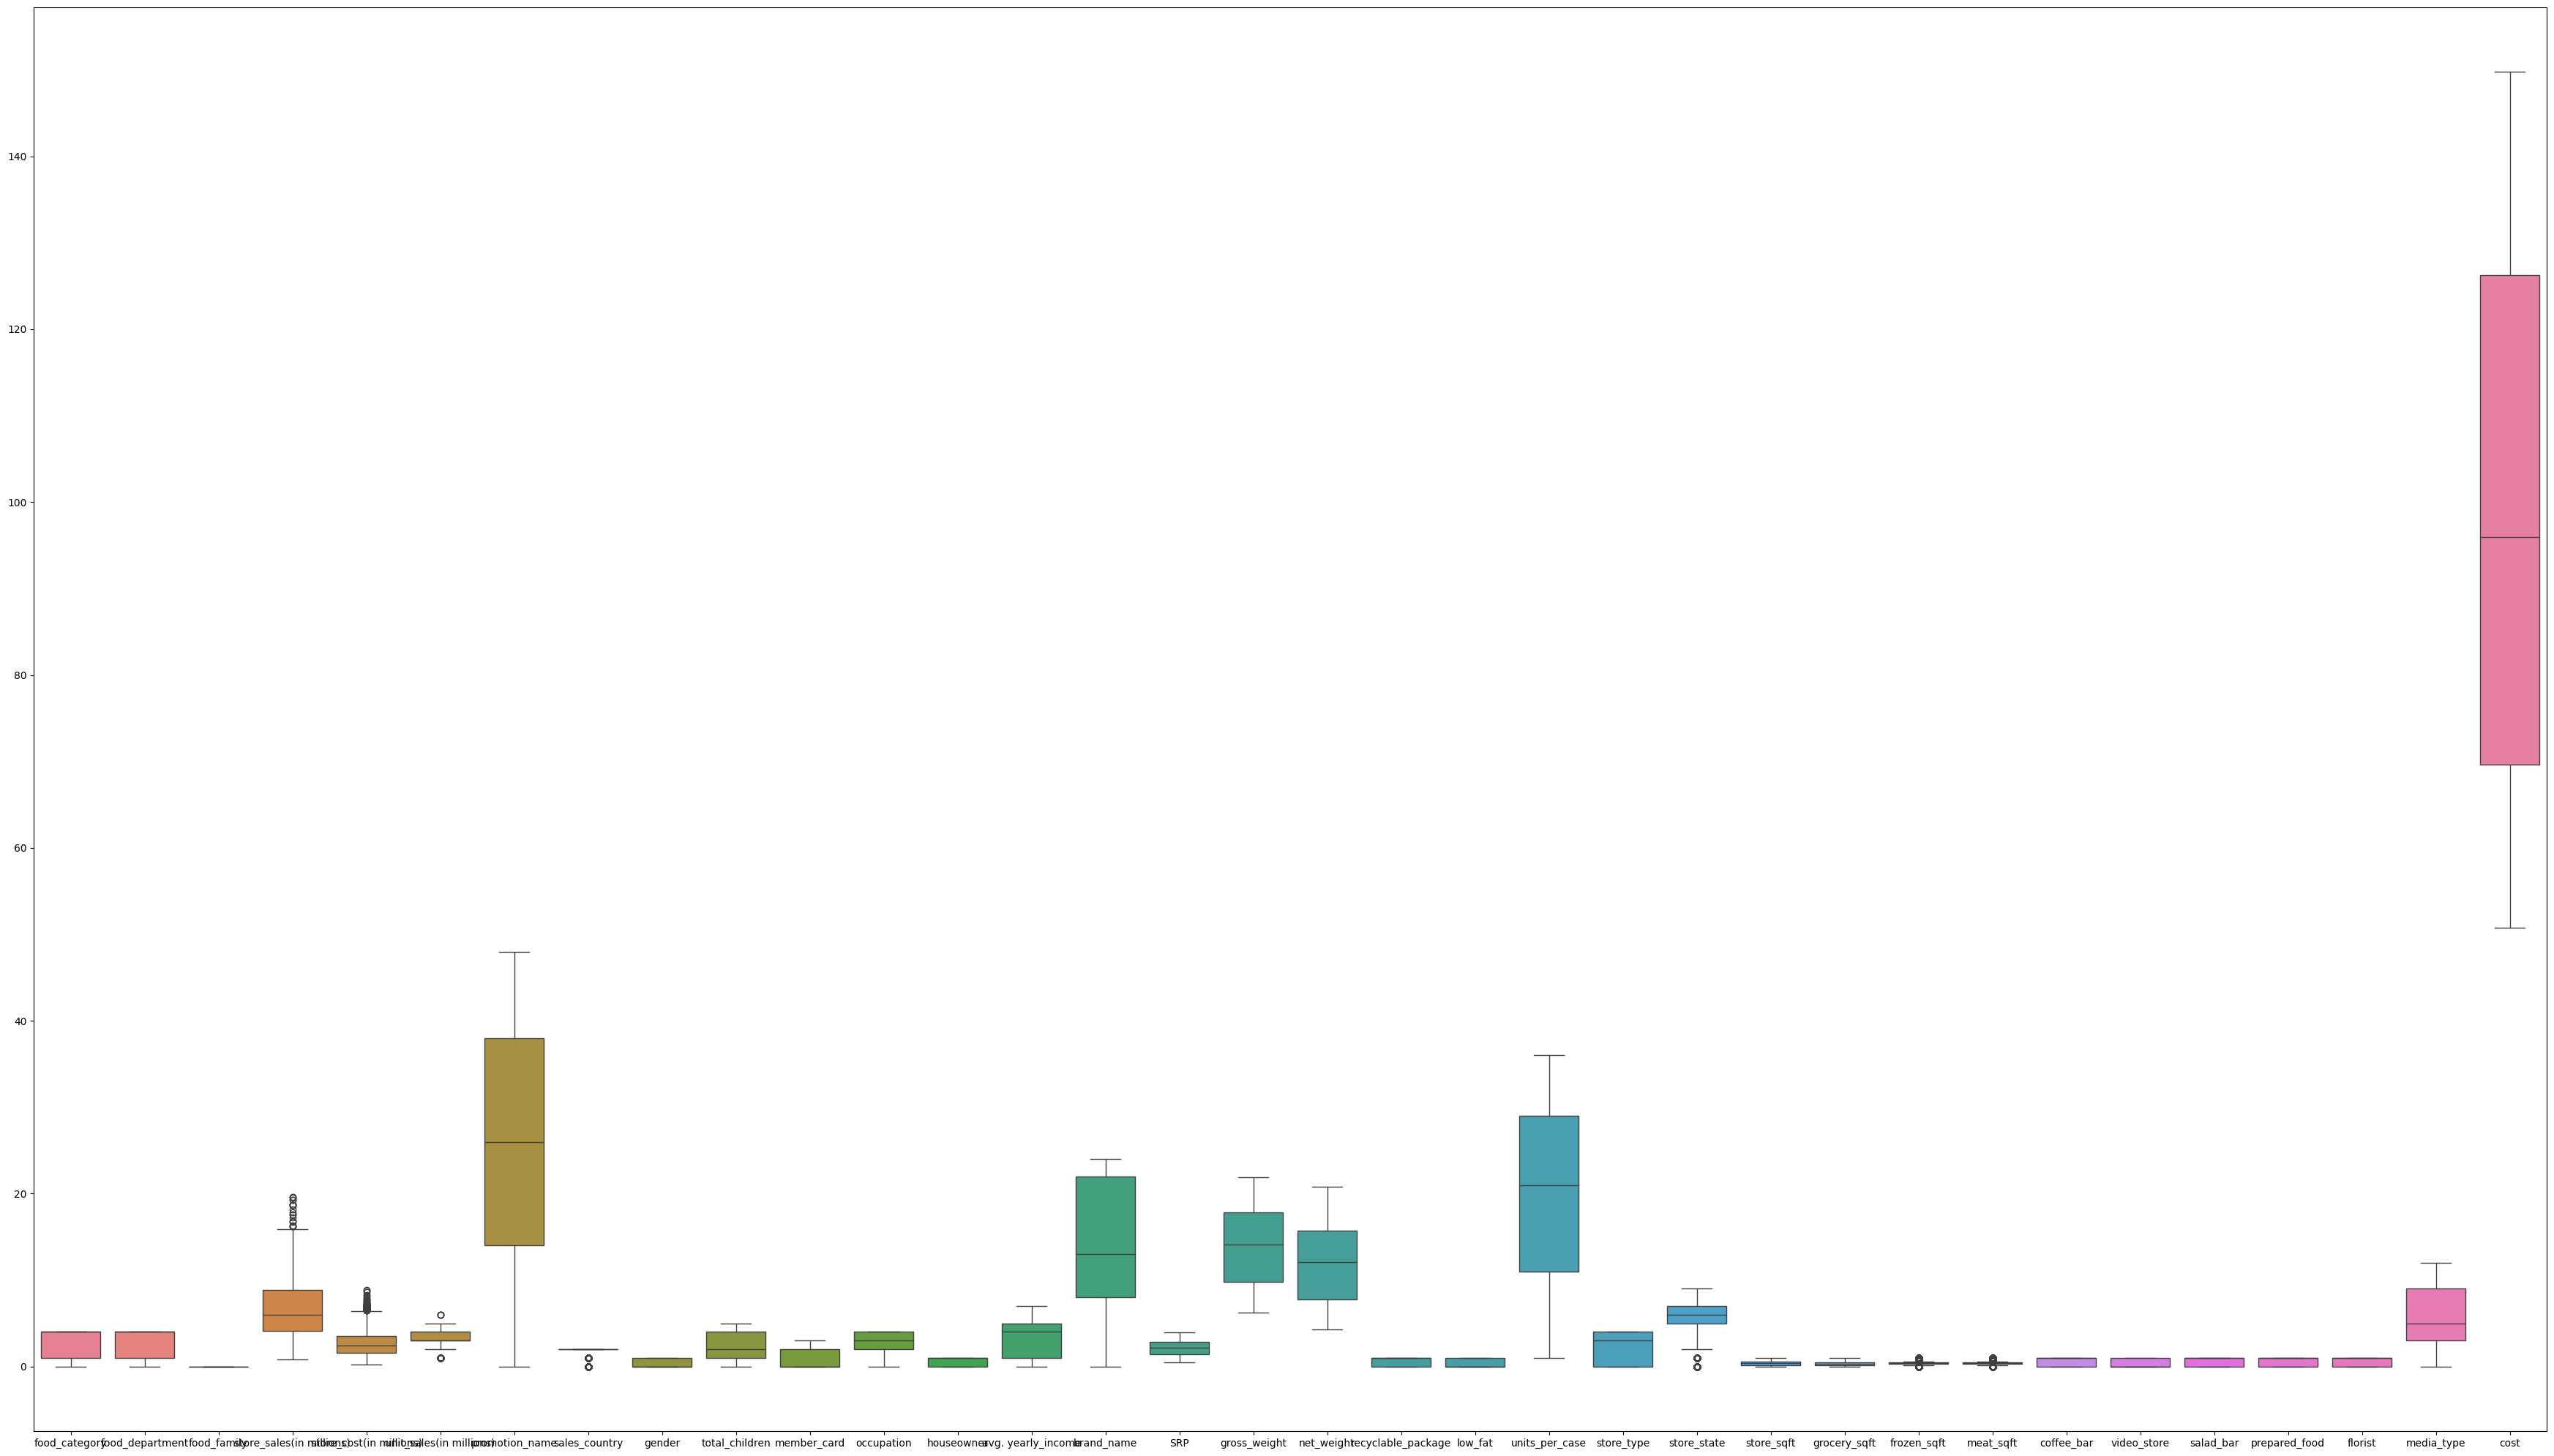

In [16]:
plt.figure(figsize=(35, 20))
sns.boxplot(data=data)
plt.tight_layout()

As we can see, it's little better than before but to see all the minimum and maximum values for each of the normalized columns:

In [17]:
columns_to_normalize = ["store_sales(in millions)", "store_cost(in millions)", "unit_sales(in millions)", "total_children", "SRP", "gross_weight", "net_weight", "recyclable_package","low_fat", "units_per_case", "store_sqft", "grocery_sqft", "frozen_sqft", "meat_sqft", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist","cost","food_category", "food_department", "food_family", "promotion_name", "sales_country", "gender", "member_card", "occupation", "houseowner", "avg. yearly_income", "brand_name", "store_type", "store_state", "media_type"]


for column in columns_to_normalize:
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"{column}: Min={min_value}, Max={max_value}")

store_sales(in millions): Min=0.78, Max=19.65
store_cost(in millions): Min=0.2496, Max=8.855
unit_sales(in millions): Min=1, Max=6
total_children: Min=0, Max=5
SRP: Min=0.51, Max=3.93
gross_weight: Min=6.2, Max=21.9
net_weight: Min=4.26, Max=20.8
recyclable_package: Min=0, Max=1
low_fat: Min=0, Max=1
units_per_case: Min=1, Max=36
store_sqft: Min=0.0, Max=1.0
grocery_sqft: Min=0.0, Max=1.0
frozen_sqft: Min=0.0, Max=1.0
meat_sqft: Min=0.0, Max=1.0
coffee_bar: Min=0.0, Max=1.0
video_store: Min=0, Max=1
salad_bar: Min=0.0, Max=1.0
prepared_food: Min=0, Max=1
florist: Min=0, Max=1
cost: Min=50.79, Max=149.75
food_category: Min=0, Max=4
food_department: Min=0, Max=4
food_family: Min=0, Max=0
promotion_name: Min=0, Max=48
sales_country: Min=0, Max=2
gender: Min=0, Max=1
member_card: Min=0, Max=3
occupation: Min=0, Max=4
houseowner: Min=0, Max=1
avg. yearly_income: Min=0, Max=7
brand_name: Min=0, Max=24
store_type: Min=0, Max=4
store_state: Min=0, Max=9
media_type: Min=0, Max=12


We can the min and max range and there are few features like store_sales, store_cost, unit_sales etc., doesn't lie between 0 and 1, so we have to normalise those features first. Here i'm using ***Z-Score Normalisation (Standardisation) and Robust Scaling***

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler

standard_scaler = StandardScaler() #Z scaler method
robust_scaler = RobustScaler()  #Robust Scaling initialisation

features_to_standardize = ['store_sales(in millions)', 'store_cost(in millions)',
                           'unit_sales(in millions)']
features_to_robust_scale = ['total_children', 'SRP','gross_weight',
                            'net_weight', 'units_per_case', 'cost','food_category','food_department','promotion_name','sales_country','member_card',
                            'occupation','avg. yearly_income','brand_name','store_type','store_state','media_type']

data[features_to_standardize] = standard_scaler.fit_transform(data[features_to_standardize]) #Standardization
data[features_to_robust_scale] = robust_scaler.fit_transform(data[features_to_robust_scale]) #Robust Scaling

In [19]:
columns_to_normalize = ["store_sales(in millions)", "store_cost(in millions)", "unit_sales(in millions)", "total_children", "SRP", "gross_weight", "net_weight", "recyclable_package","low_fat", "units_per_case", "store_sqft", "grocery_sqft", "frozen_sqft", "meat_sqft", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist","cost","food_category", "food_department", "food_family", "promotion_name", "sales_country", "gender", "member_card", "occupation", "houseowner", "avg. yearly_income", "brand_name", "store_type", "store_state", "media_type"]

for column in columns_to_normalize:
    min_value = data[column].min()
    max_value = data[column].max()
    print(f"{column}: Min={min_value}, Max={max_value}")

store_sales(in millions): Min=-1.7351531650163499, Max=3.803601743488332
store_cost(in millions): Min=-1.7062129370822687, Max=4.335624855201972
unit_sales(in millions): Min=-2.5917109668776446, Max=3.557298583868129
total_children: Min=-0.6666666666666666, Max=1.0
SRP: Min=-1.129251700680272, Max=1.197278911564626
gross_weight: Min=-0.9874999999999999, Max=0.9749999999999999
net_weight: Min=-0.9886506935687264, Max=1.0970996216897857
recyclable_package: Min=0, Max=1
low_fat: Min=0, Max=1
units_per_case: Min=-1.1111111111111112, Max=0.8333333333333334
store_sqft: Min=0.0, Max=1.0
grocery_sqft: Min=0.0, Max=1.0
frozen_sqft: Min=0.0, Max=1.0
meat_sqft: Min=0.0, Max=1.0
coffee_bar: Min=0.0, Max=1.0
video_store: Min=0, Max=1
salad_bar: Min=0.0, Max=1.0
prepared_food: Min=0, Max=1
florist: Min=0, Max=1
cost: Min=-0.7982688570923866, Max=0.9498321851263027
food_category: Min=-1.3333333333333333, Max=0.0
food_department: Min=-1.3333333333333333, Max=0.0
food_family: Min=0, Max=0
promotion_nam

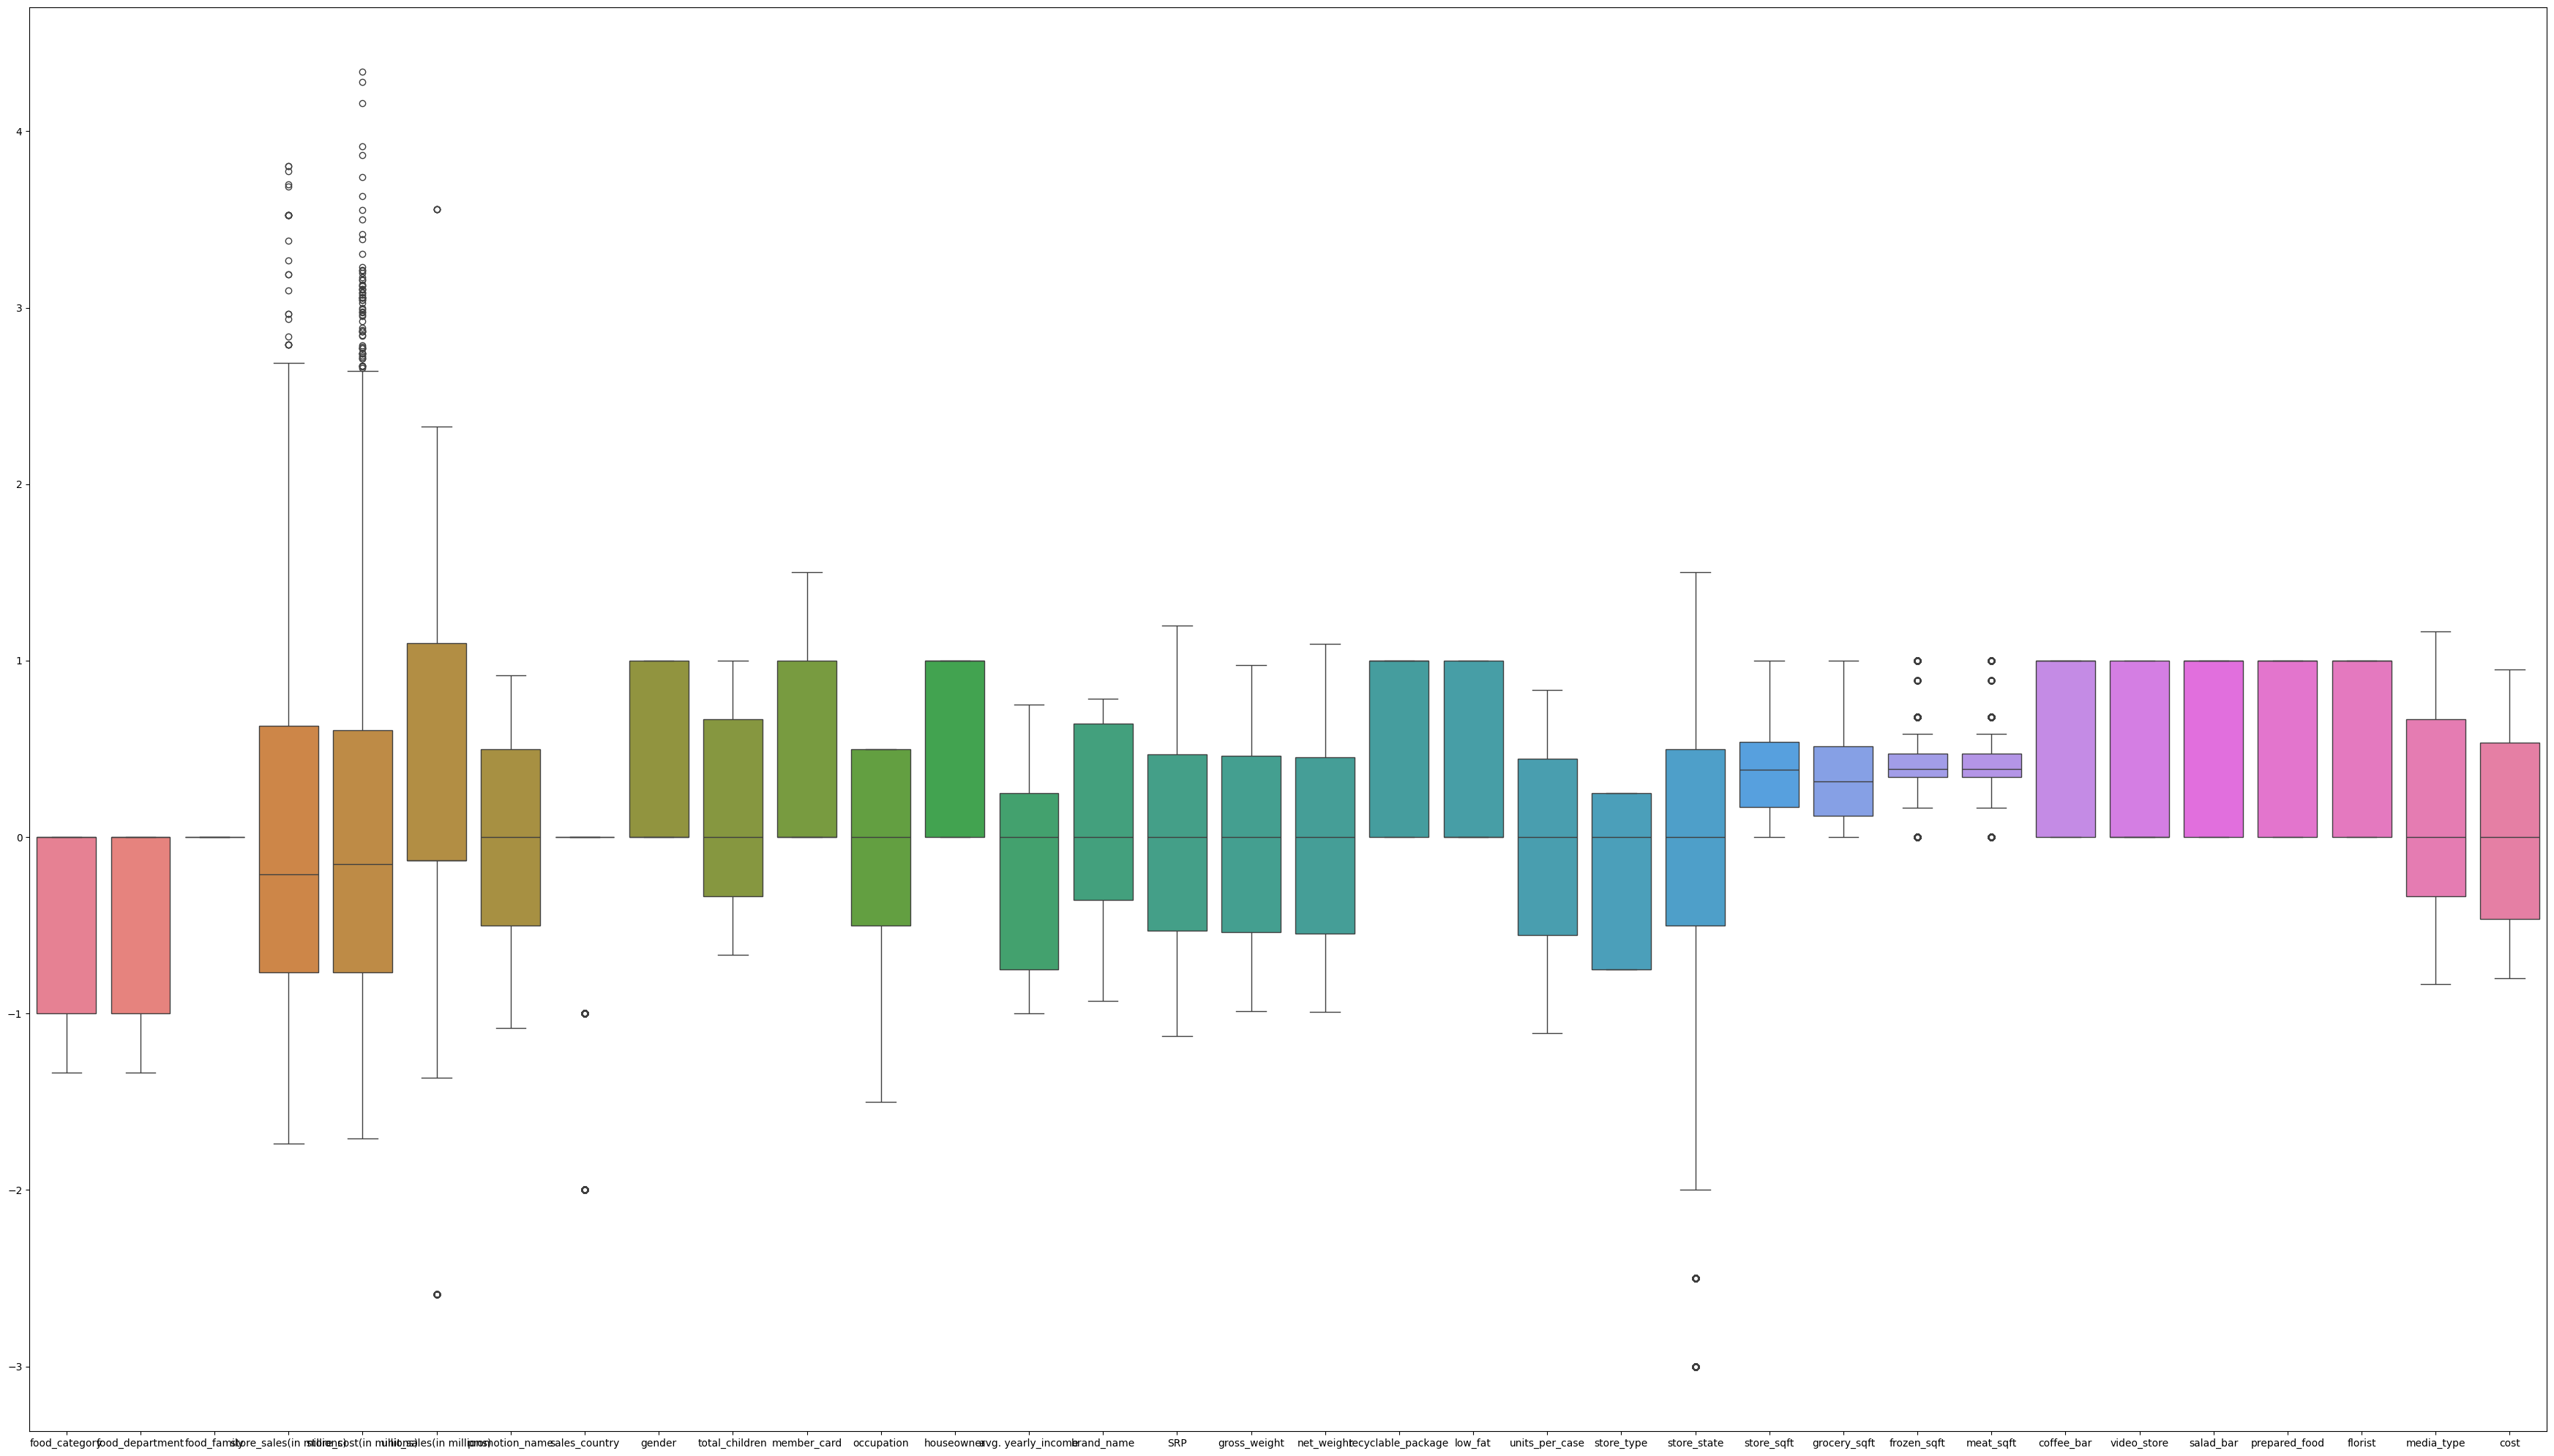

In [20]:
plt.figure(figsize=(35, 20))
sns.boxplot(data=data)
plt.tight_layout()

### **Q. Do the ranges of the predictor variables make sense?**

Before Normalising, the ranges were extreme and different from one feature to the other. After using Standardization, robust scaling or the min-max ethod, I could be able get the data ranges closer.

### Checking Correlation

In [21]:
data.corr(numeric_only=True)

food_category  food_department  food_family  \
food_category                  1.000000         0.926289          NaN   
food_department                0.926289         1.000000          NaN   
food_family                         NaN              NaN          NaN   
store_sales(in millions)       0.073792         0.034112          NaN   
store_cost(in millions)        0.075501         0.037687          NaN   
unit_sales(in millions)        0.008869         0.008940          NaN   
promotion_name                -0.004274         0.000174          NaN   
sales_country                  0.306188         0.305168          NaN   
gender                         0.003975         0.002479          NaN   
total_children                -0.024548        -0.028197          NaN   
member_card                   -0.014074        -0.016085          NaN   
occupation                     0.016320         0.007593          NaN   
houseowner                     0.017594         0.015949          NaN   
avg. yearly_income             0.006262         0.009477          NaN   
brand_name                     0.227456         0.223617          NaN   
SRP                            0.084262         0.037129          NaN   
gross_weight                  -0.012499         0.043261          NaN   
net_weight                    -0.000251         0.055548          NaN   
recyclable_package            -0.086133        -0.098146          NaN   
low_fat                       -0.070814        -0.048274          NaN   
units_per_case                 0.003212        -0.018973          NaN   
store_type                     0.083054         0.080971          NaN   
store_state                   -0.050868        -0.053158          NaN   
store_sqft                    -0.116180        -0.116529          NaN   
grocery_sqft                  -0.103337        -0.104582          NaN   
frozen_sqft                   -0.091381        -0.090107          NaN   
meat_sqft                     -0.091386        -0.090109          NaN   
coffee_bar                    -0.038010        -0.033734          NaN   
video_store                   -0.059076        -0.057606          NaN   
salad_bar                     -0.087577        -0.089220          NaN   
prepared_food                 -0.087577        -0.089220          NaN   
florist                       -0.020477        -0.022066          NaN   
media_type                    -0.076731        -0.078561          NaN   
cost                          -0.035041        -0.034863          NaN   

                          store_sales(in millions)  store_cost(in millions)  \
food_category                             0.073792                 0.075501   
food_department                           0.034112                 0.037687   
food_family                                    NaN                      NaN   
store_sales(in millions)                  1.000000                 0.952528   
store_cost(in millions)                   0.952528                 1.000000   
unit_sales(in millions)                   0.524606                 0.497028   
promotion_name                            0.019618                 0.014944   
sales_country                             0.007555                 0.001644   
gender                                    0.015681                 0.017120   
total_children                            0.075439                 0.063116   
member_card                              -0.006425                -0.003986   
occupation                               -0.007314                -0.003760   
houseowner                               -0.010184                -0.006237   
avg. yearly_income                       -0.009367                -0.007423   
brand_name                               -0.104684                -0.099184   
SRP                                       0.826587                 0.789438   
gross_weight                              0.045404                 0.042052   
net_weight                                0.0455

<Axes: >

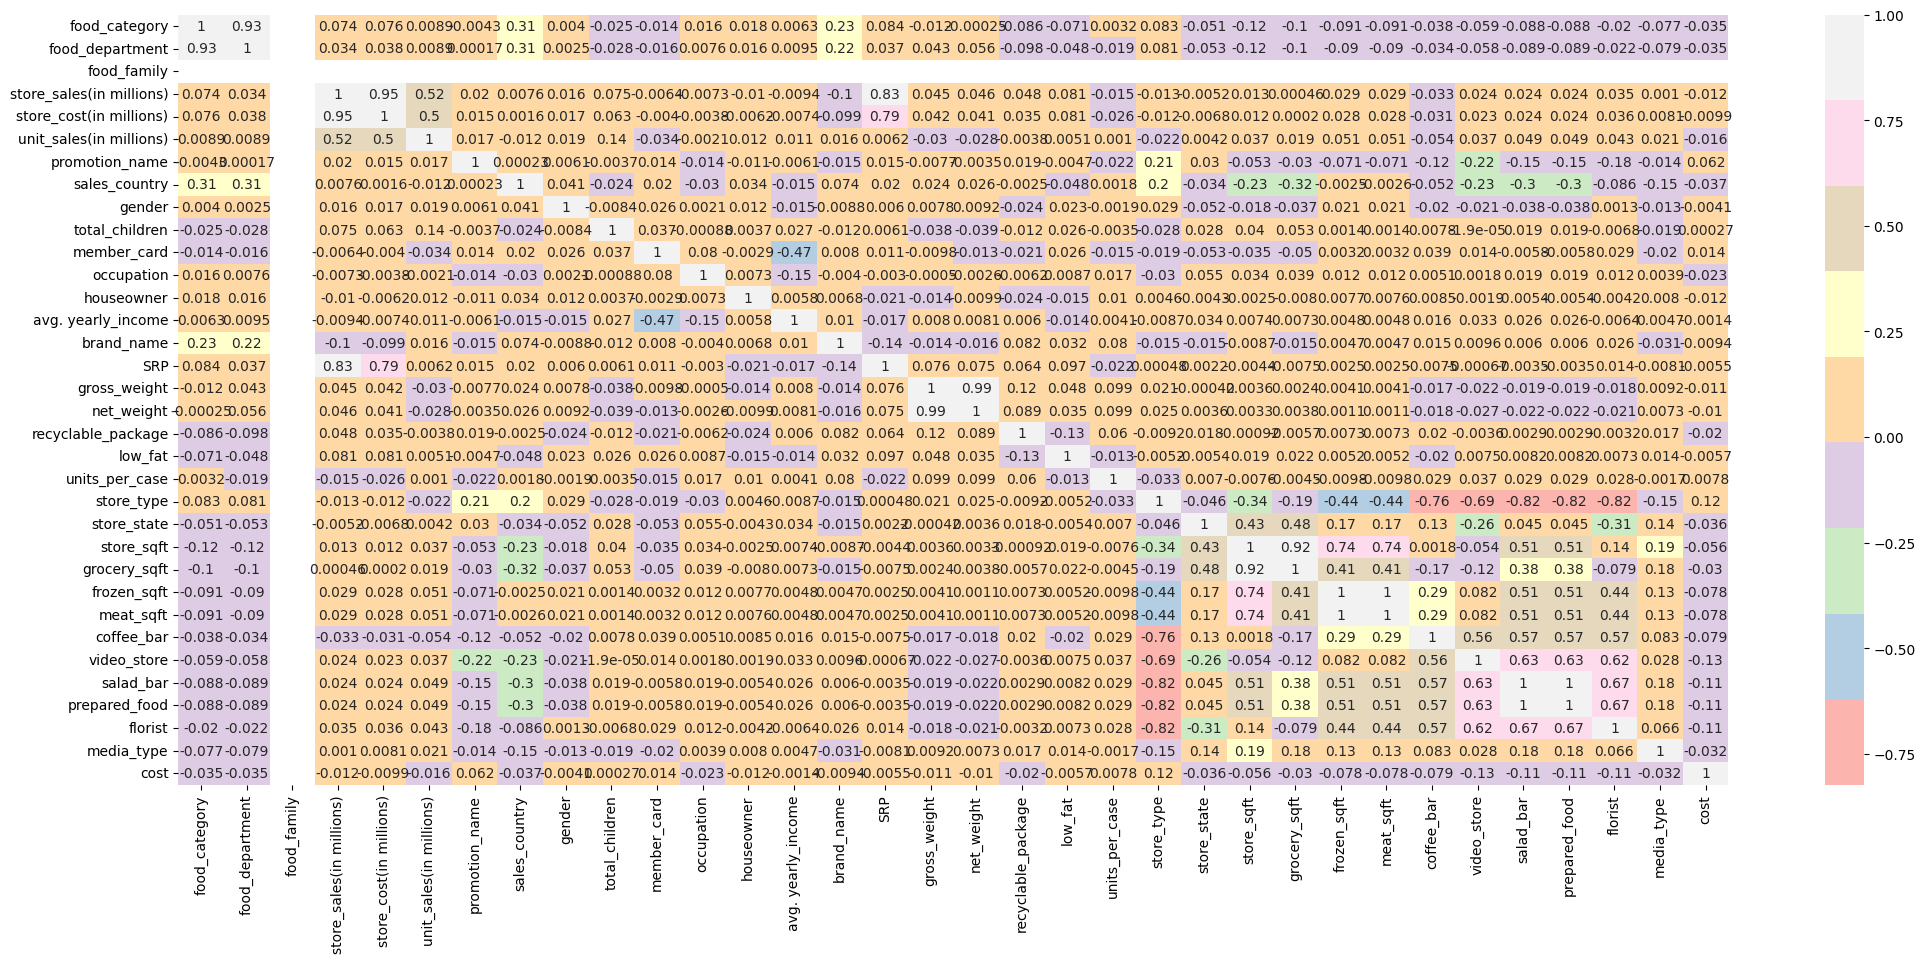

In [22]:
#Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Pastel1")    #this calculates the corelation, adds the annotations(numbers)

### Observation

From this heatmap, we can determine which features are highly correlated in the dataset. High correlation can be indicated by colors closer to either end of the color spectrum—typically, the colors corresponding to 1 or -1 on the legend. For example, features like "food_category" and "food_department" have a high positive correlation, as indicated by the darker color (close to 1). On the other hand, "store_state" and "store_type" seem to have a high negative correlation (closer to -1). These insights can help identify relationships between variables, which could be critical for tasks like feature selection in model building.

### **Q. In the predictor variables independent of all the other predictor variables?**

The independent variables are not entirely independent of each other; rather, there is multicollinearity among many of them. This is evident from the correlation table and pairplot map, which reveal strong correlations or relationships between various pairs of independent variables

## **Feature Importance Analysis**

In [23]:
import statsmodels.api as sm

model = sm.OLS(data['cost'], data[['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'gender', 'total_children', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type']]).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   cost   R-squared (uncentered):                   0.052
Model:                            OLS   Adj. R-squared (uncentered):              0.046
Method:                 Least Squares   F-statistic:                              8.755
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    5.61e-39
Time:                        17:44:46   Log-Likelihood:                         -3823.4
No. Observations:                4999   AIC:                                      7709.
Df Residuals:                    4968   BIC:                                      7911.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
food_category               -0.0165      0.037     -0.442      0.659      -0.090       0.057
food_department              0.0006      0.037      0.015      0.988      -0.072       0.073
food_family               1.948e-09   3.58e-10      5.447      0.000    1.25e-09    2.65e-09
store_sales(in millions)    -0.0110      0.041     -0.266      0.790      -0.092       0.070
store_cost(in millions)      0.0108      0.024      0.445      0.656      -0.037       0.058
unit_sales(in millions)      0.0006      0.019      0.030      0.976      -0.037       0.038
promotion_name               0.0099      0.013      0.768      0.443      -0.015       0.035
sales_country               -0.1466      0.021     -6.850      0.000      -0.189      -0.105
gender                      -0.0076      0.015     -0.513      0.608      -0.037       0.021
total_children              -0.0050      0.015     -0.331      0.740      -0.035       0.025
member_card                  0.0160      0.016      1.010      0.313      -0.015       0.047
occupation                  -0.0157      0.014     -1.112      0.266      -0.044       0.012
houseowner                  -0.0121      0.015     -0.794      0.427      -0.042       0.018
avg. yearly_income           0.0111      0.016      0.717      0.473      -0.019       0.042
brand_name                   0.0099      0.016      0.624      0.532      -0.021       0.041
SRP                          0.0062      0.047      0.131      0.896      -0.087       0.099
gross_weight                 0.0136      0.090      0.151      0.880      -0.164       0.191
net_weight                  -0.0232      0.088     -0.265      0.791      -0.195       0.149
recyclable_package          -0.0288      0.016     -1.826      0.068      -0.060       0.002
low_fat                     -0.0139      0.015     -0.910      0.363      -0.044       0.016
units_per_case               0.0166      0.013      1.241      0.215      -0.010       0.043
store_type                  -0.3850      0.074     -5.188      0.000      -0.530      -0.240
store_state                 -0.0480      0.009     -5.379      0.000      -0.066      -0.031
store_sqft                  -1.8413      0.299     -6.153      0.000      -2.428      -1.255
grocery_sqft                 1.3862      0.217      6.395      0.000       0.961       1.811
frozen_sqft                947.4825    173.878      5.449      0.000     606.604    1288.361
meat_sqft                 -946.3608    173.791     -5.445      0.000   -1287.067    -605.654
coffee_bar                  -0.0541      0.038     -1.428      0.153      -0.128       0.020
video_store                 -0.3397      0.033    -10.286      0.000      -0.404      -0.275
salad_ba

### **Q. Which independent variables are useful to predict a target (dependent variable)?**



Significance level of 0.05 is commonly used. Coefficients with significance values less than 0.05 are considered statistically significant, indicating that there is evidence to reject the null hypothesis that the coefficient is equal to zero. Coefficients with values greater than 0.05 are considered non-significant.

Statistically Significant Coefficients:

- sales_country: The coefficient for "sales_country" is -0.1466, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- store_type: The coefficient for "store_type" is -0.3850, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- store_state: The coefficient for "store_state" is -0.0480, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- store_sqft: The coefficient for "store_sqft" is -1.8413, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- grocery_sqft: The coefficient for "grocery_sqft" is 1.3862, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- frozen_sqft: The coefficient for "frozen_sqft" is 947.4825, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- meat_sqft: The coefficient for "meat_sqft" is -946.3608, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- video_store: The coefficient for "video_store" is -0.3397, with a significance value (P>|t|) of <0.001, indicating statistical significance.

- florist: The coefficient for "florist" is -0.2846, with a significance value (P>|t|) of <0.001, indicating statistical significance.

The rest of the independent variables aren't significant to determine the cost.

### **Q. Which independent variables have missing data? How much?**

No independent variables have missing data, as we have already imputed the data using forward fill method.

## **Training, Validation and Test Split**

Training set is used to train the model, the validation set helps fine-tune model hyperparameters and evaluate performance during training, and the test set provides an unbiased evaluation of the final model's performance on unseen data

Training Set: Approximately 70% of the data. With 5000 records, this would be around 3500 records.

Validation Set: Approximately 15% of the data. With 5000 records, this would be around 750 records.

Test Set: Approximately 15% of the data. With 5000 records, this would also be around 750 records

In [24]:
from sklearn.model_selection import train_test_split
# Independent on X, Dependent Y
X = data[
    [

     "store_sales(in millions)", "store_cost(in millions)", "unit_sales(in millions)", "total_children", "SRP", "gross_weight", "net_weight", "recyclable_package","low_fat", "units_per_case", "store_sqft", "grocery_sqft", "frozen_sqft", "meat_sqft", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist","food_category", "food_department", "food_family", "promotion_name", "sales_country", "gender", "member_card", "occupation", "houseowner", "avg. yearly_income", "brand_name", "store_type", "store_state", "media_type"

    ]
]
y = data["cost"]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

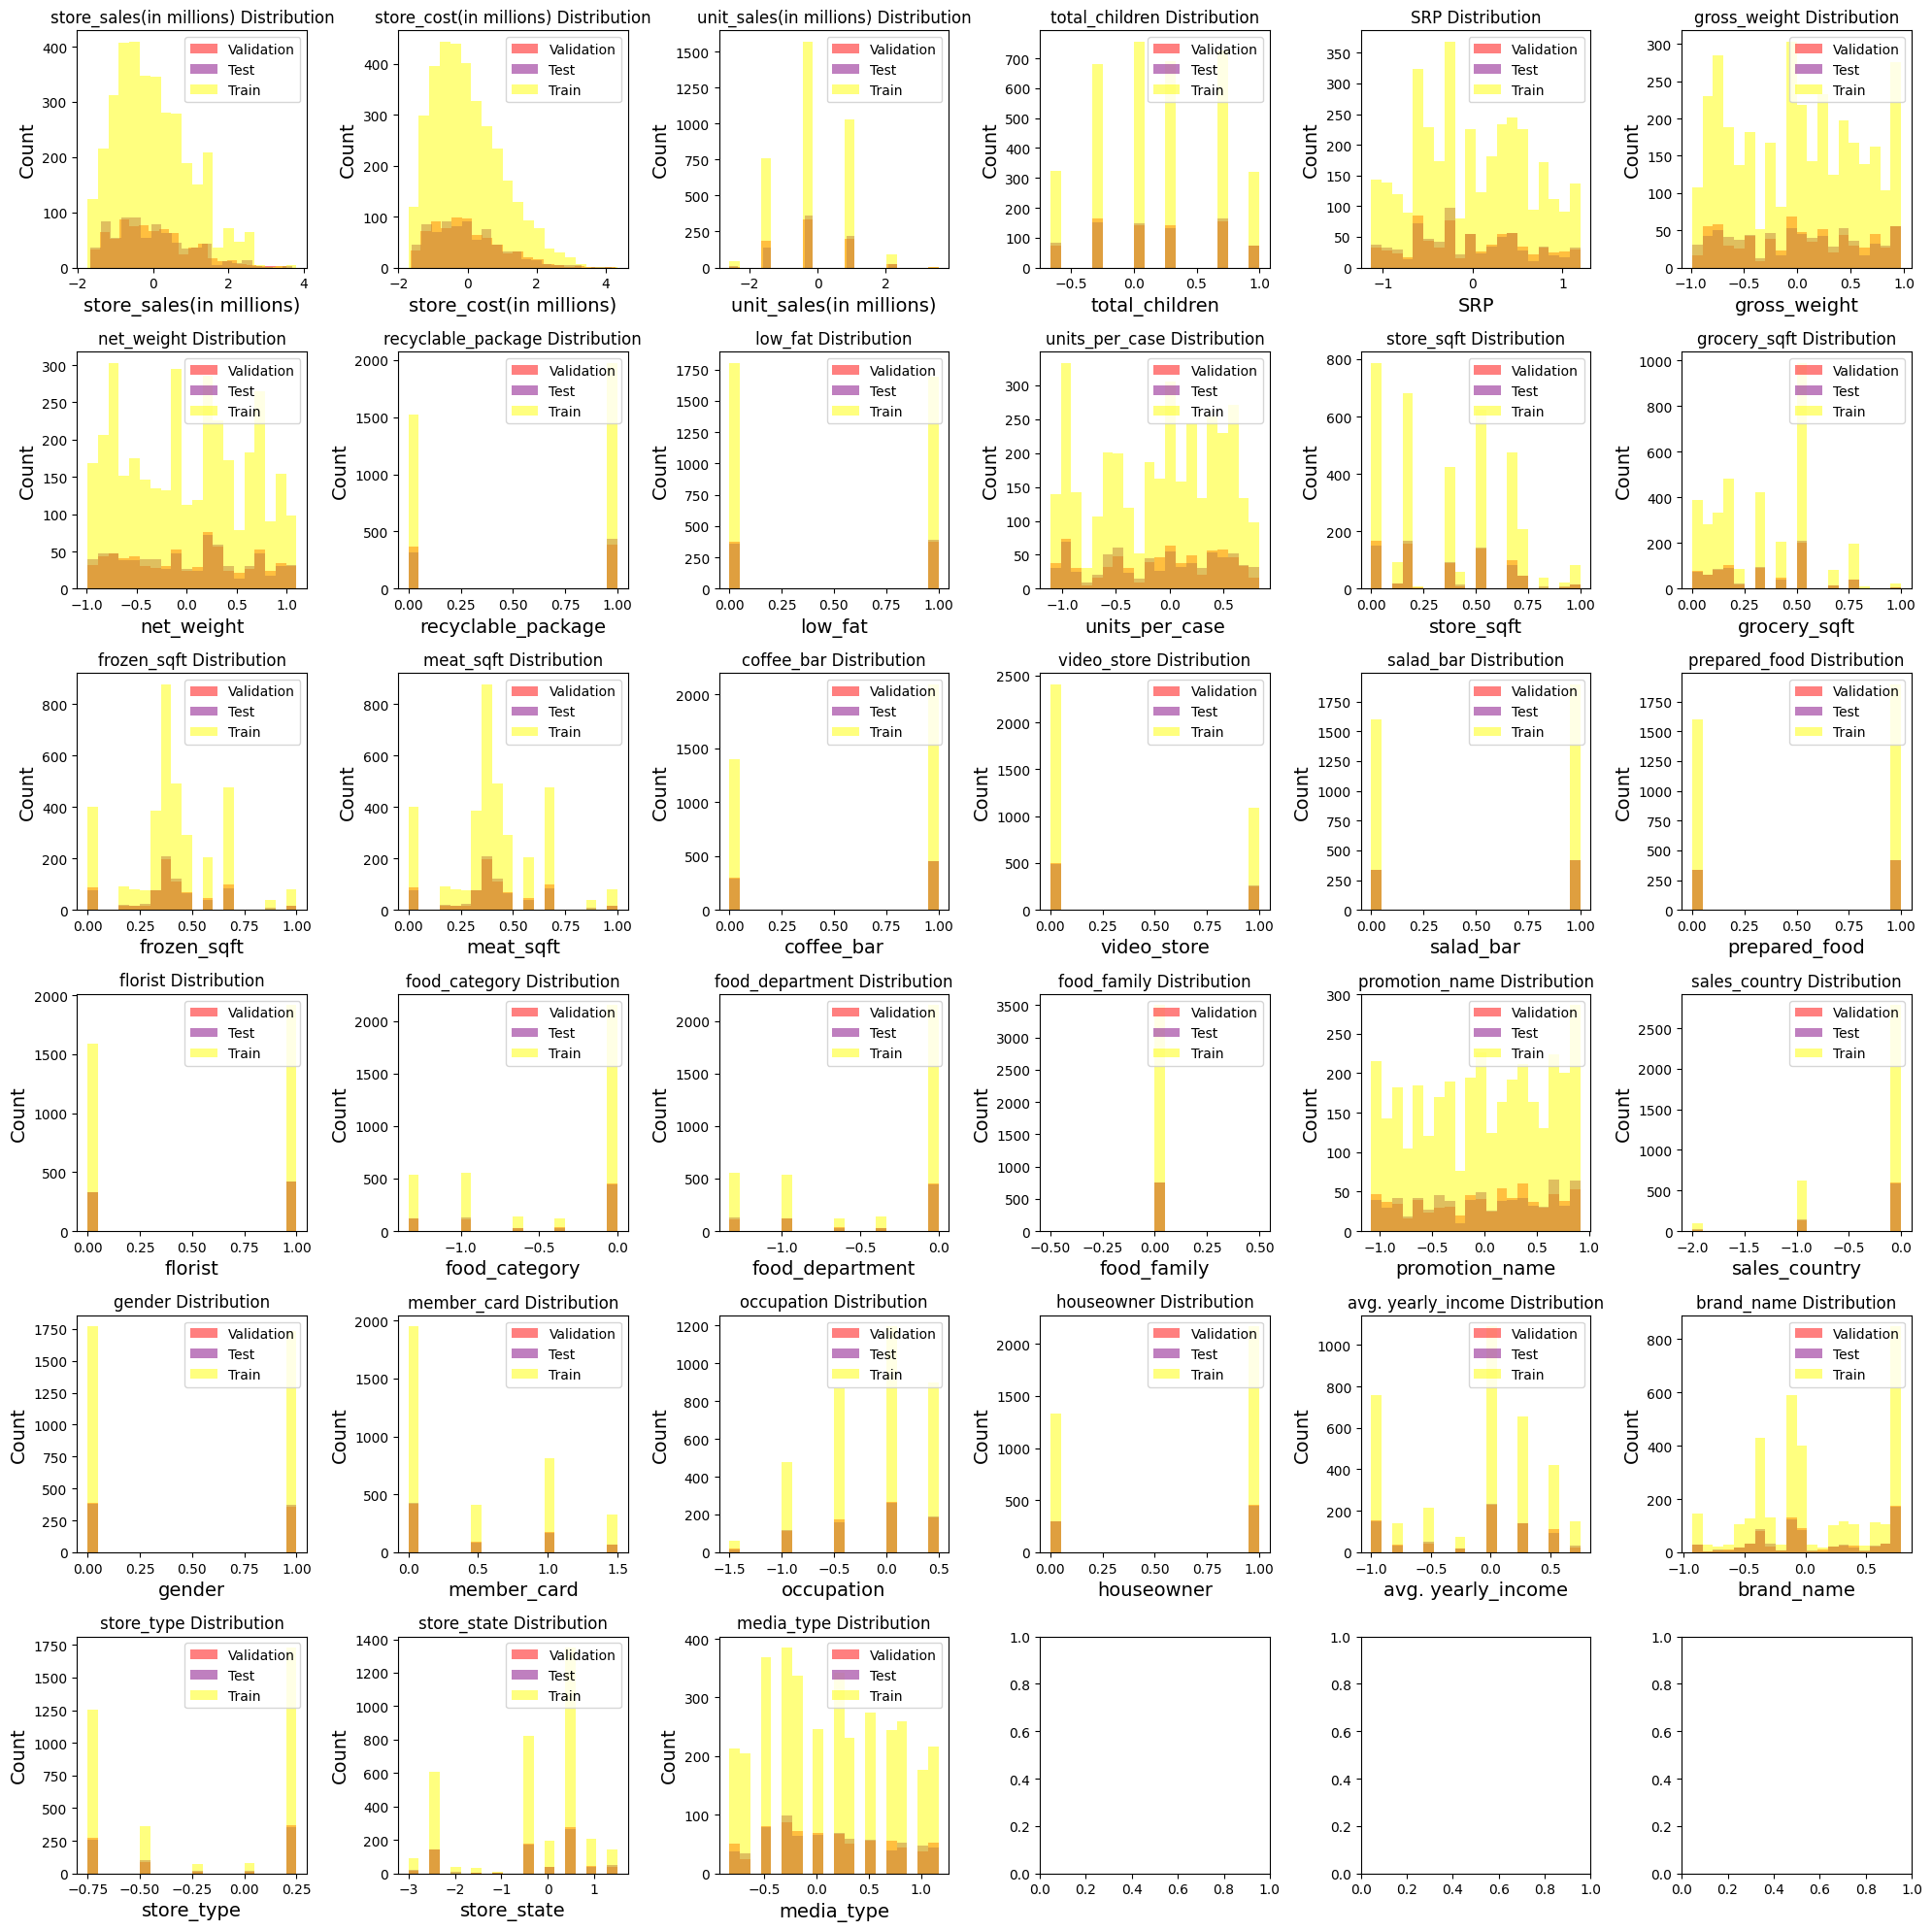

In [25]:
features_to_plot = [
   "store_sales(in millions)", "store_cost(in millions)", "unit_sales(in millions)", "total_children", "SRP", "gross_weight", "net_weight", "recyclable_package","low_fat", "units_per_case", "store_sqft", "grocery_sqft", "frozen_sqft", "meat_sqft", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist","food_category", "food_department", "food_family", "promotion_name", "sales_country", "gender", "member_card", "occupation", "houseowner", "avg. yearly_income", "brand_name", "store_type", "store_state", "media_type"
]

# Plotting the data to see the histogram
fig, axs = plt.subplots(6, 6, figsize=(20, 20))

for i, feature in enumerate(features_to_plot):
    row = i // 6
    col = i % 6

    axs[row, col].hist(X_val[feature], bins=20, alpha=0.5, label="Validation", color='red')
    axs[row, col].hist(X_test[feature], bins=20, alpha=0.5, label="Test", color='purple')
    axs[row, col].hist(X_train[feature], bins=20, alpha=0.5, label="Train", color='yellow')
    axs[row, col].set_xlabel(feature, size=14)
    axs[row, col].set_ylabel("Count", size=14)
    axs[row, col].legend(loc="upper right")
    axs[row, col].set_title("{} Distribution".format(feature))

plt.tight_layout()
plt.show()

### **Q. Do the training and test sets have the same data?**

Yes few of them have almost same data and few not. As we can see there are no missing values for features like salad_bar, coffee_bar, prepared_food etc.,

The dataset division into test, train, and validation sets seems appropriate, except for some boundary values missing in the store_sales, store_cost, net_weight, units_per_case etc,.

## **Modeling with imputed Outliers**

In [26]:
#Making a copy of the data
data_copy = data.copy()

In [27]:
from sklearn.linear_model import LinearRegression

# Fit the LinearRegression model
modelLinear = LinearRegression()
modelLinear.fit(X_train, y_train)

# Print the regression coefficients
print("The intercept b0= ", modelLinear.intercept_)
print("The coefficient b1= ", modelLinear.coef_)

The intercept b0=  185.36575447900643
The coefficient b1=  [-5.11552994e-02  3.24517231e-02  7.11726736e-03 -1.94115995e-03
  3.41955002e-02 -1.13026236e-01  1.05452696e-01 -1.81906561e-02
  5.47726346e-03  2.02355752e-02  1.22516804e+03 -1.07803937e+03
  3.12055243e+02 -1.02134859e+03 -5.19616644e-02 -3.09615740e-01
  1.27992934e-02  1.27992902e-02 -3.02230775e-01 -7.04033674e-03
 -1.99354094e-02 -6.89333035e-11  1.78795272e-03 -1.06090611e-01
 -1.66366830e-02  1.69661598e-02 -1.10508569e-02 -3.65623973e-02
  1.36560747e-02  7.61512786e-03 -3.78251359e-01 -5.26765419e-02
 -2.58064741e-02]


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# First, ensure all columns except 'cost' are numerical for analysis
data = data.select_dtypes(include=["int64", "float64", "float"])

# Identify outliers using Z-score
z_scores = np.abs((data - data.mean()) / data.std())
outlier_mask = (z_scores > 3).any(axis=1)

# Option 1: Remove outliers
data_no_outliers = data[~outlier_mask]

# Option 2: Keep outliers (Full dataset is already suitable for this option)

# Split data without outliers into features (X) and target variable (y)
X_no_outliers = data_no_outliers.drop(columns=["cost"])
y_no_outliers = data_no_outliers["cost"]

# Repeat the splitting for the dataset with outliers
X_with_outliers = data.drop(columns=["cost"])
y_with_outliers = data["cost"]

# Split data without outliers into train and test sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Option 2: Keep outliers (Full dataset)
data_with_outliers = data.select_dtypes(include=["int64", "float64"])

# Split full data into features and target variable
X_with_outliers = data_with_outliers.drop(columns=["cost"])
y_with_outliers = data_with_outliers["cost"]

# Split full data into train and test sets
X_train_with_outliers, X_test_with_outliers, y_train_with_outliers, y_test_with_outliers = train_test_split(
    X_with_outliers, y_with_outliers, test_size=0.2, random_state=42
)

# Initialize and train model with no outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Initialize and train model with outliers
model_with_outliers = LinearRegression()
model_with_outliers.fit(X_train_with_outliers, y_train_with_outliers)

# Make predictions with both models
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)
y_pred_with_outliers = model_with_outliers.predict(X_test_with_outliers)

# Evaluate model performance with and without outliers
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
mse_with_outliers = mean_squared_error(y_test_with_outliers, y_pred_with_outliers)

print("MSE (Outliers retained):", mse_with_outliers)
print("MSE (Outliers removed):", mse_no_outliers)

MSE (Outliers retained): 0.2841252229481979
MSE (Outliers removed): 0.2726403466126271


### Observation

The results indicate that the model trained on the dataset with outliers removed has a lower Mean Squared Error (MSE) compared to the model trained with the outliers included.

Interpretation:

- MSE (Outliers retained): 0.2841 - This is slightly higher, indicating the model's predictive performance is less accurate when outliers are present in the training data.
- MSE (Outliers removed): 0.2727 - This value is lower, suggesting that the model has better predictive accuracy when outliers are removed from the training data.

### **Q. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

Removing outliers can lead to improved model accuracy, as it prevents the model from being skewed by atypical data points. Keeping outliers might affect the model negatively if these data points are noise rather than indicative of a trend. As we can see from the above interpretation and observation made.

### **Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [29]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import mean_squared_error

# Let's assume 'df' is your DataFrame containing all numerical columns as mentioned

np.random.seed(42)  # For reproducible results

missing_rates = [0.01, 0.05, 0.1]
imputers = {
    "KNNImputer": KNNImputer(n_neighbors=5),
    "SimpleImputer_Mean": SimpleImputer(strategy='mean'),
    "SimpleImputer_Median": SimpleImputer(strategy='median')
}

# Function to introduce missing values at the specified rate
def introduce_missingness(data, rate):
    data_with_missing = data.copy()
    total_entries = data.size
    total_missing = int(total_entries * rate)
    missing_indices = [divmod(i, data.shape[1]) for i in np.random.choice(range(total_entries), total_missing, replace=False)]
    for row, col in missing_indices:
        data_with_missing.iat[row, col] = np.nan
    return data_with_missing

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    # Calculate the absolute difference between original and imputed values
    residual_error = (original_data - imputed_data).abs()

    # Calculate bias and variance
    bias = residual_error.mean()
    variance = residual_error.var()

    # Compute percentage error while handling small or zero original values
    # To avoid division by a value close to zero, we'll use a threshold
    threshold = 1e-6
    valid_indices = original_data > threshold  # Indices of values greater than the threshold
    percentage_error = (residual_error[valid_indices] / original_data[valid_indices]).mean() * 100

    return percentage_error.mean(), bias.mean(), variance.mean()


for rate in missing_rates:
    missing_data = introduce_missingness(data, rate)
    print(f"\nMissing Rate: {rate * 100}%")

    for name, imputer in imputers.items():
        # Impute the missing values
        imputed_data = pd.DataFrame(imputer.fit_transform(missing_data), columns=data.columns)

        # Evaluate imputation
        percentage_error, bias, variance = evaluate_imputation(data, imputed_data)

        print(f"Imputer: {name}")
        print(f"Percentage Error: {percentage_error.mean():.2f}%")
        print(f"Bias: {bias.mean():.2f}")
        print(f"Variance: {variance.mean():.2f}")



Missing Rate: 1.0%
Imputer: KNNImputer
Percentage Error: 0.58%
Bias: 0.00
Variance: 0.00
Imputer: SimpleImputer_Mean
Percentage Error: 0.84%
Bias: 0.00
Variance: 0.00
Imputer: SimpleImputer_Median
Percentage Error: 0.82%
Bias: 0.00
Variance: 0.00

Missing Rate: 5.0%
Imputer: KNNImputer
Percentage Error: 3.22%
Bias: 0.01
Variance: 0.01
Imputer: SimpleImputer_Mean
Percentage Error: 4.18%
Bias: 0.02
Variance: 0.02
Imputer: SimpleImputer_Median
Percentage Error: 3.97%
Bias: 0.02
Variance: 0.02

Missing Rate: 10.0%
Imputer: KNNImputer
Percentage Error: 6.82%
Bias: 0.03
Variance: 0.02
Imputer: SimpleImputer_Mean
Percentage Error: 8.70%
Bias: 0.05
Variance: 0.03
Imputer: SimpleImputer_Median
Percentage Error: 8.37%
Bias: 0.04
Variance: 0.04


From the results, it appears that all three imputation methods—KNNImputer, SimpleImputer_Mean, and SimpleImputer_Median—struggle with accuracy as the percentage of missing data increases, shown by high percentage errors, especially at a 10% missing rate. The bias increases with the missing rate for all methods, indicating a systematic deviation from the original values. However, the variance of the error shows inconsistency; while it increases for 5% missing data, the results for 1% missing data are not computable (nan), suggesting potential issues in calculation or small sample effects. Overall, these methods show varying levels of effectiveness in recovering missing values, with accuracy decreasing as more data is removed.

# **Modeling and Interpretability**

### Permutation Importance : Let's calculate Feature weights using Permutation Importance.

In [40]:
import eli5
from eli5.sklearn import PermutationImportance

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Replacing the infinite values with 'NaN'

In [42]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [44]:
target = data['cost']

In [45]:
features = data[['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'gender', 'total_children', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type']]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [53]:
def get_permutation_importance(data):
    X = data[['food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'gender', 'total_children', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type']]
    y = data[['cost']]
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    # Create linear regression object
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    pi = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(pi, feature_names = X_test.columns.tolist())

In [56]:
from sklearn import linear_model
get_permutation_importance(data)

### Observation

The observed permutation importances suggest that 'prepared_food' and 'salad_bar' have astronomically high importance weights with very large standard deviations, indicating potential issues with the data or model. The 'store_sqft', 'grocery_sqft', and 'meat_sqft' have significantly lower but still substantial positive importance weights, suggesting these features have a notable impact on the model's predictions. Features like 'store_type', 'video_store', and 'florist' show much smaller positive weights, indicating a minor influence on the model's output. The remaining features have weights close to or practically zero, implying they have little to no influence on the predictive ability of the model in the current context.

In [52]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   cost   R-squared (uncentered):                   0.053
Model:                            OLS   Adj. R-squared (uncentered):              0.046
Method:                 Least Squares   F-statistic:                              7.234
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    3.67e-30
Time:                        19:56:46   Log-Likelihood:                         -3035.0
No. Observations:                3999   AIC:                                      6132.
Df Residuals:                    3968   BIC:                                      6327.
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
food_category               -0.0276      0.042     -0.663      0.508      -0.109       0.054
food_department             -0.0097      0.041     -0.234      0.815      -0.091       0.072
food_family              -1.281e-09   2.99e-10     -4.289      0.000   -1.87e-09   -6.96e-10
store_sales(in millions)     0.0113      0.046      0.246      0.806      -0.079       0.102
store_cost(in millions)      0.0028      0.027      0.105      0.916      -0.050       0.056
unit_sales(in millions)     -0.0050      0.022     -0.229      0.819      -0.047       0.037
promotion_name               0.0029      0.014      0.199      0.842      -0.025       0.031
sales_country               -0.1294      0.024     -5.429      0.000      -0.176      -0.083
gender                      -0.0087      0.016     -0.525      0.599      -0.041       0.024
total_children              -0.0023      0.017     -0.138      0.890      -0.036       0.031
member_card                  0.0235      0.017      1.344      0.179      -0.011       0.058
occupation                  -0.0095      0.016     -0.603      0.546      -0.040       0.021
houseowner                  -0.0205      0.017     -1.208      0.227      -0.054       0.013
avg. yearly_income           0.0248      0.017      1.433      0.152      -0.009       0.059
brand_name                   0.0104      0.018      0.592      0.554      -0.024       0.045
SRP                         -0.0193      0.053     -0.364      0.716      -0.124       0.085
gross_weight                -0.0559      0.101     -0.551      0.581      -0.255       0.143
net_weight                   0.0411      0.098      0.418      0.676      -0.152       0.234
recyclable_package          -0.0180      0.018     -1.027      0.305      -0.053       0.016
low_fat                     -0.0108      0.017     -0.635      0.525      -0.044       0.023
units_per_case               0.0188      0.015      1.269      0.205      -0.010       0.048
store_type                  -0.3375      0.083     -4.077      0.000      -0.500      -0.175
store_state                 -0.0540      0.010     -5.451      0.000      -0.073      -0.035
store_sqft                  -1.5292      0.334     -4.584      0.000      -2.183      -0.875
grocery_sqft                 1.1666      0.242      4.826      0.000       0.693       1.641
frozen_sqft                838.1005    195.364      4.290      0.000     455.076    1221.125
meat_sqft                 -837.1573    195.267     -4.287      0.000   -1219.990    -454.325
coffee_bar                  -0.0255      0.042     -0.604      0.546      -0.108       0.057
video_store                 -0.3338      0.037     -9.095      0.000      -0.406      -0.262
salad_ba

In [57]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [59]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.459961
RMSE: 0.533718
R2 0.030243


### Observation

For the linear model:

- Mean Absolute Error (MAE) is 0.459961.
- Root Mean Squared Error (RMSE) is 0.533718.
- R-squared (R2) score is 0.030243.

These metrics are used to assess the performance of the linear model. A lower MAE and RMSE indicate better accuracy, while a higher R-squared score signifies a better fit of the model to the data. However, the metrics suggest the linear model is not capturing much of the complexity or patterns in the data, as shown by the low R-squared score. The MAE and RMSE values, while not very high, further reinforce that the model’s predictions are often off by a moderate margin.

- P > |t| has a value less than 0.05 for "unit_sales" ," "store_sales," "sales_country," "avg. yearly_income," "SRP," "store_type," "store_state," "store_sqft," "grocery_sqft," "frozen_sqft," "coffee_bar," "florist" indicating that these variables are important in predicting the 'cost'.

## **Tree Model**

### **Q. Fit a tree-based model and interpret the nodes**

### Random Forest

In [68]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=2468)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.09222048155547458


### Observation

The code creates an instance of the DecisionTreeRegressor class named DTree. The max_depth parameter is set to 3, which limits the maximum depth of the decision tree to 3 levels. This helps prevent overfitting, which is when the model performs well on the training data but poorly on new, unseen data. The random_state parameter is set to 2468, which ensures that the results are reproducible.

Then, the fit() method is called on DTree to train the decision tree model using the training data X_train and y_train. X_train contains the input features (also called independent variables or predictors) for the training data, while y_train contains the corresponding target values (also called dependent variable or response variable).

After training the model, the code uses the score() method to evaluate the performance of the model on the test data. The score() method returns the coefficient of determination R^2 of the prediction, which is a measure of how well the model fits the test data. The higher the R^2 value, the better the model's performance.

In [69]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

### Observation

This code defines a function named model_sel. This function takes a machine learning model as input. It then uses this model to predict the target values based on a test dataset. After making predictions, it calculates and prints the R-squared score, which measures how well the model fits the data. A higher R-squared score indicates a better fit of the model to the data.

### Model Evaluation on DecisionTreeRegressor

In [70]:
print("DECISION TREE REGRESSION: ")
print("-"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-------------------------
MODEL EVALUATION

r2_score of the model: 
0.09222048155547458


In [71]:
prediction_tree = DTree.predict(X_test)

### Checking accuracy of predictions

In [72]:
print('Decision tree - Test')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree - Test
MAE: 0.434894
RMSE: 0.516381
R2 0.092220


### Observation

For the decision tree model:

- Mean Absolute Error (MAE) is 0.434894.
- Root Mean Squared Error (RMSE) is 0.516381.
- R-squared (R2) score is 0.092220.

These metrics help evaluate how well the decision tree model performs. A lower MAE and RMSE indicate better performance, while a higher R-squared score signifies a better fit of the model to the data.

### Interpreting the nodes

[Text(0.5, 0.875, 'store_type <= -0.625\nsquared_error = 0.281\nsamples = 3999\nvalue = 0.037'),
 Text(0.25, 0.625, 'media_type <= 0.917\nsquared_error = 0.283\nsamples = 1424\nvalue = -0.071'),
 Text(0.125, 0.375, 'promotion_name <= 0.729\nsquared_error = 0.287\nsamples = 1266\nvalue = -0.036'),
 Text(0.0625, 0.125, 'squared_error = 0.287\nsamples = 1217\nvalue = -0.015'),
 Text(0.1875, 0.125, 'squared_error = 0.013\nsamples = 49\nvalue = -0.539'),
 Text(0.375, 0.375, 'grocery_sqft <= 0.454\nsquared_error = 0.161\nsamples = 158\nvalue = -0.356'),
 Text(0.3125, 0.125, 'squared_error = 0.02\nsamples = 102\nvalue = -0.613'),
 Text(0.4375, 0.125, 'squared_error = 0.08\nsamples = 56\nvalue = 0.111'),
 Text(0.75, 0.625, 'media_type <= -0.083\nsquared_error = 0.27\nsamples = 2575\nvalue = 0.096'),
 Text(0.625, 0.375, 'media_type <= -0.583\nsquared_error = 0.282\nsamples = 1279\nvalue = 0.011'),
 Text(0.5625, 0.125, 'squared_error = 0.258\nsamples = 410\nvalue = 0.245'),
 Text(0.6875, 0.125, 

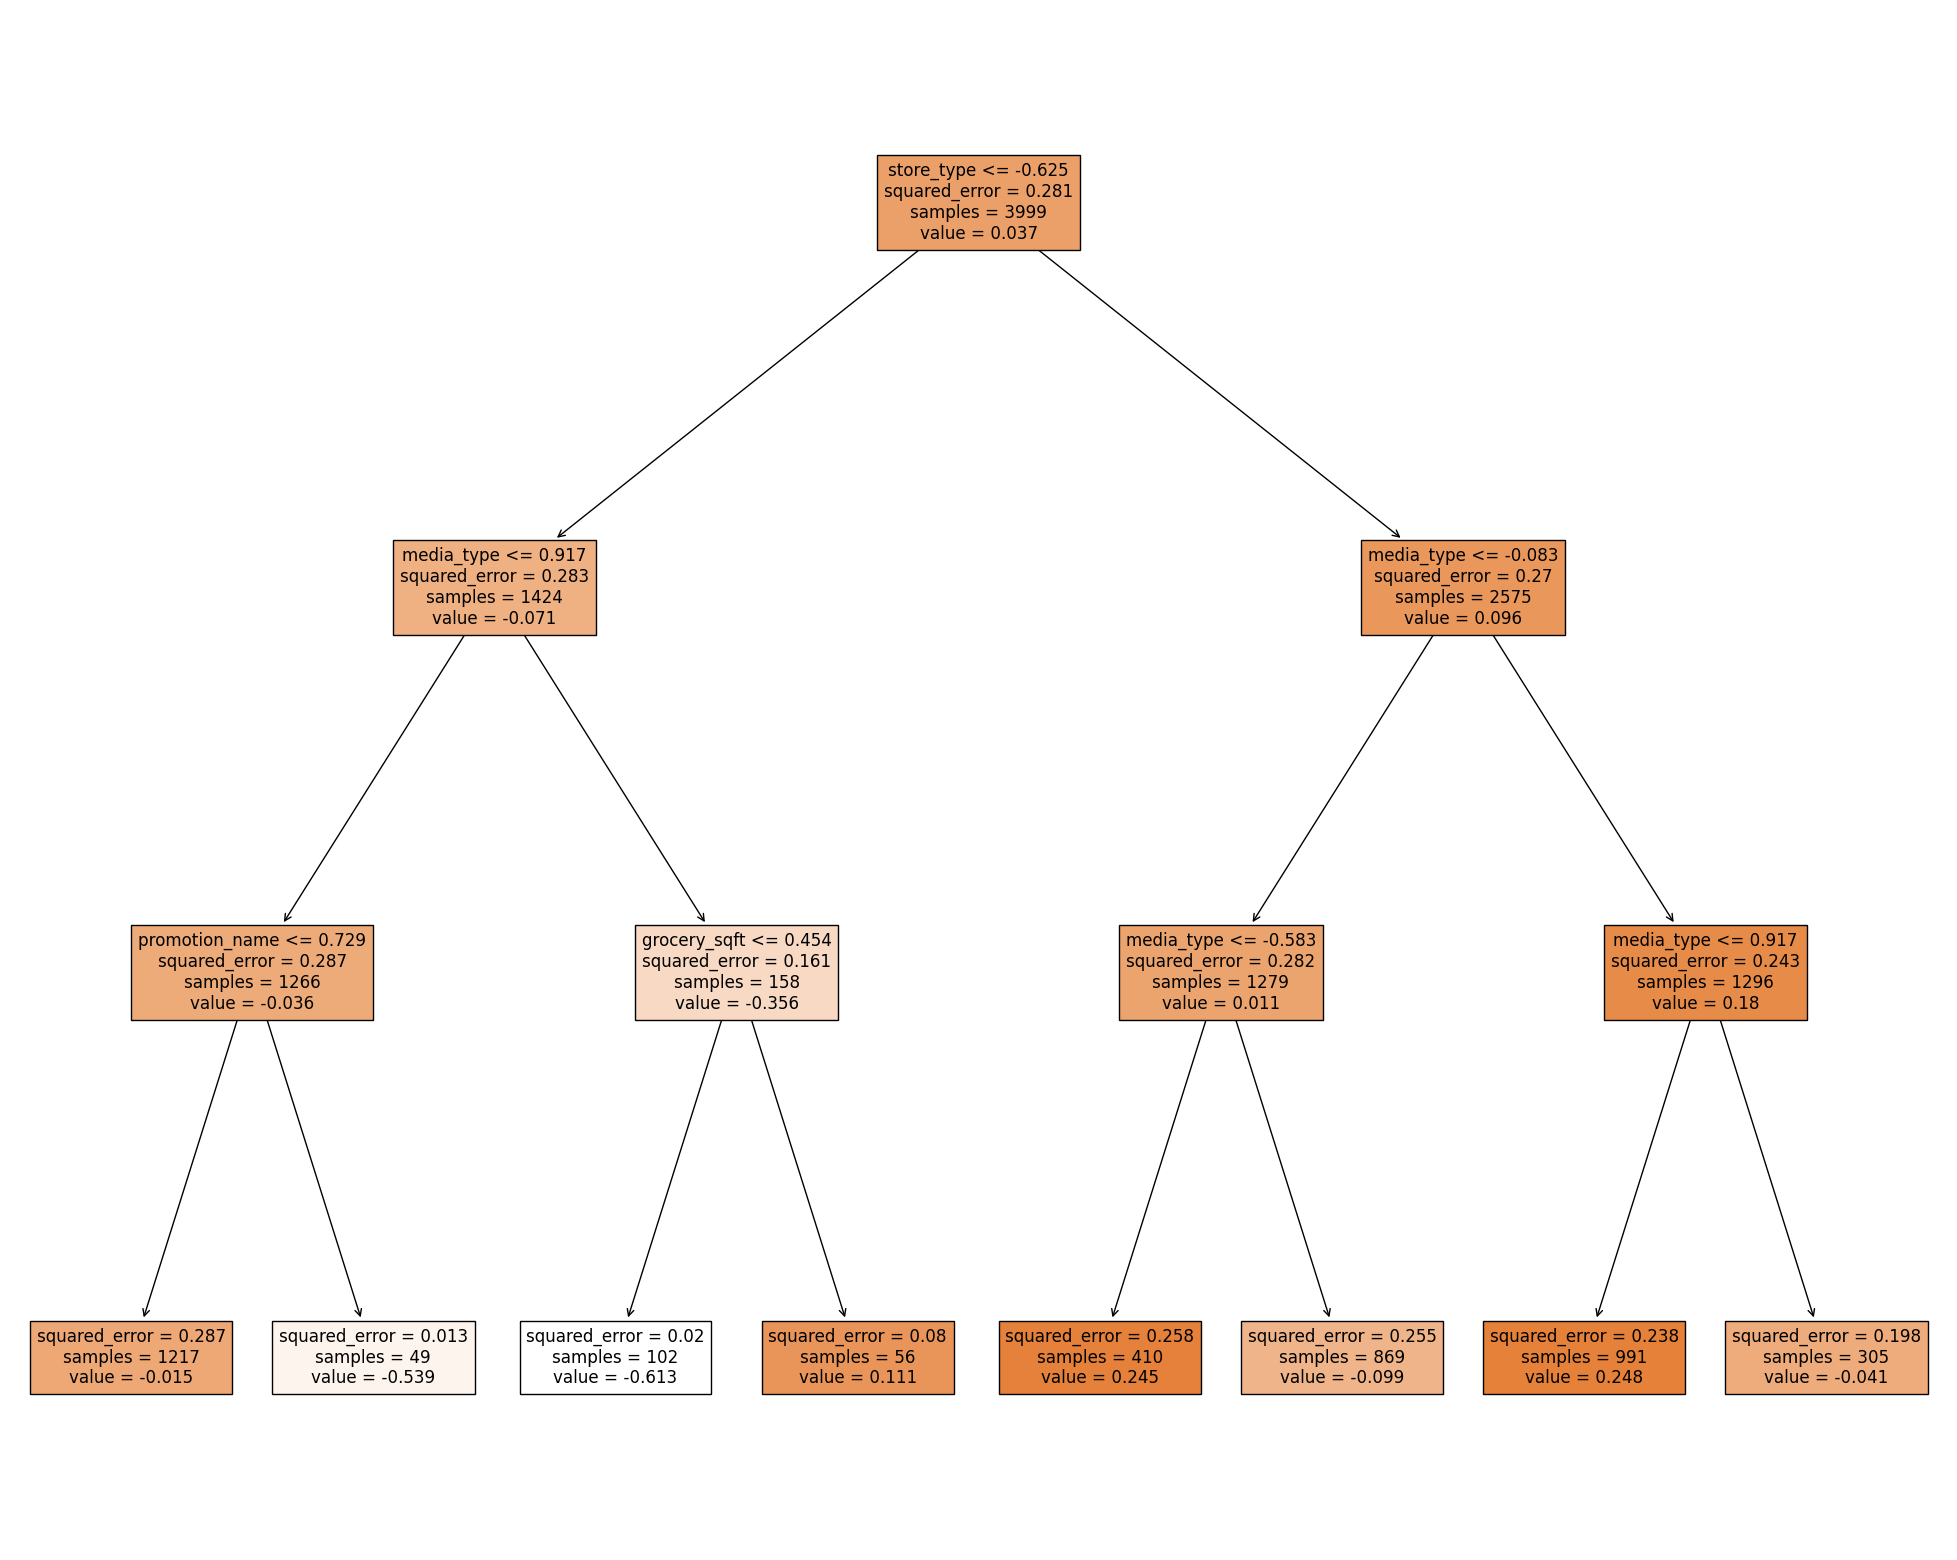

In [73]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

The code uses the plot_tree function from the sklearn.tree module to create a graphical representation of a decision tree model (DTree). The feature_names argument specifies the names of the features used in the model, and the filled argument indicates whether to color the nodes to indicate their impurity.

The resulting plot shows the decision tree with the root node at the top and subsequent nodes branching out below. Each node represents a decision based on a particular feature, with the branch to the left indicating the outcome when the feature meets the decision criterion and the branch to the right indicating the outcome when it does not.

The plot includes the squared_error and samples values for each node, as well as the value for the leaf nodes, which represents the predicted target value for that group of samples.

### Observation

The max_depth of the tree is set at 3. With each note, the data is being split into smaller subset. Node 0 has all samples of the dataset, but it'll be lower by the Node 3. Node 0 - store_type - took 3999 samples to arrive at value of 98.055. Node 2 and Node 3 - store_type - took 1422 and 2575 samples to set a bracket for promotion_name, grocery_sqft and media_type and further the leaves of the tree has a bracket for mse, wherein each mse bracket is given a value.

### **Q. Use auto ml to find the best model**

In [74]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


### Insatlling h2o

In [75]:
!pip install h2o

### Importing h2o & Connecting to the h2o environment

In [76]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         3 hours 2 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_4d1r1d
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.090 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

### Importing h2o AutoML

In [77]:
from h2o.automl import H2OAutoML

In [106]:
data_autom = h2o.import_file('https://raw.githubusercontent.com/polampellys/INFO6105_DataScienceEngineeringMethods_SPRING2024/main/media_prediction_and_its_costV1.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [107]:
data_autom.head()

food_category    food_department    food_family      store_sales(in millions)    store_cost(in millions)    unit_sales(in millions)  promotion_name         sales_country    gender      total_children  member_card    occupation      houseowner    avg. yearly_income    brand_name      SRP    gross_weight    net_weight    recyclable_package    low_fat    units_per_case  store_type          store_state      store_sqft    grocery_sqft    frozen_sqft    meat_sqft    coffee_bar    video_store    salad_bar    prepared_food    florist  media_type            cost
---------------  -----------------  -------------  --------------------------  -------------------------  -------------------------  ---------------------  ---------------  --------  ----------------  -------------  --------------  ------------  --------------------  ------------  -----  --------------  ------------  --------------------  ---------  ----------------  ------------------  -------------  ------------  --------------  -------------  -----------  ------------  -------------  -----------  ---------------  ---------  ------------------  ------
Breakfast Foods  Frozen Foods       Food                                 7.36                     2.7232                          4  Bag Stuffers           USA              F                        1  Normal         Skilled Manual  Y             $10K - $30K           Carrington     1.84           19.7          17.7                      1          0                17  Deluxe Supermarket  OR                    27694           18670           5415         3610             1              1            1                1          1  Daily Paper, Radio  126.62
Breakfast Foods  Frozen Foods       Food                                 5.52                     2.5944                          3  Cash Register Lottery  USA              M                        0  Silver         Professional    Y             $50K - $70K           Carrington     1.84           19.7          17.7                      1          0                17  Deluxe Supermarket  OR                    27694           18670           5415         3610             1              1            1                1          1  Daily Paper, Radio   59.86
Breakfast Foods  Frozen Foods       Food                                 3.68                     1.3616                          2  High Roller Savings    USA              F                        4  Normal         Manual          N             $10K - $30K           Carrington     1.84           19.7          17.7                      1          0                17  Deluxe Supermarket  OR                    27694           18670           5415         3610             1              1            1                1          1  Daily Paper, Radio   84.16
Breakfast Foods  Frozen Foods       Food                                 3.68                     1.1776                          2  Cash Register Lottery  USA              F                        2  Bronze         Manual          Y             $30K - $50K           Carrington     1.84           19.7          17.7                      1          0                17  Deluxe Supermarket  OR                    27694           18670           5415         3610             1              1            1                1          1  In-Store Coupon      95.78
Breakfast Foods  Frozen Foods       Food                                 4.08                     1.428                           3  Double Down Sale       USA              M                        0  Bronze         Skilled Manual  N             $30K - $50K           Golden         1.36            7.12          5.11                     0          1                29  Deluxe Supermarket  OR                    27694           18670           5415         3610             1              1            1                1          1  Radio                50.79
Breakfast Foods  Frozen Foods       Food                                 4.08   

### Splitting train test and vailidation into 70:15:15 ratio



In [109]:
train,test,valid = data_autom.split_frame(ratios=[.7, .15])

In [110]:
print(data_train.shape)
print(data_test.shape)

(3999, 34)
(1000, 34)


### Seperating dependent variable from the independent

In [111]:
y = "cost"
x = data_autom.columns
x.remove(y)

### Initializes an H2O AutoML object.

The command below initializes an H2O AutoML object with specific settings to limit the number of models built, exclude certain algorithms, and control the verbosity and cross-validation settings.

In [112]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [113]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
21:04:53.435: Project: AutoML_2_20240402_210453
21:04:53.435: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:04:53.436: Setting stopping tolerance adaptively based on the training frame: 0.016814442410177276
21:04:53.436: Build control seed: 10
21:04:53.436: training frame: Frame key: AutoML_2_20240402_210453_training_py_10_sid_8a59    cols: 34    rows: 3537  chunks: 8    size: 245964  checksum: 2494744850671329094
21:04:53.436: validation frame: Frame key: py_12_sid_8a59    cols: 34    rows: 731  chunks: 8    size: 147067  checksum: 7985257427863564876
21:04:53.436: leaderboard frame: Frame key: py_12_sid_8a59    cols: 34    rows: 731  chunks: 8    size: 147067  checksum: 7985257427863564876
21:04:53.436: blending frame: NULL
21:04:53.436: response column: cost
21:04:53.436: fold column: null
21:04:53.436: weights column: null
21:04:53.443: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_2_20240402_210453


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    140                140                         132477                 7            7            7             21            96            59.9643

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.6283870471978061
RMSE: 0.7927086773826852
MAE: 0.495550020286381
RMSLE: 0.00878637356805212
Mean Residual Deviance: 0.6283870471978061

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 15.447371390716546
RMSE: 3.930314413722717
MAE: 1.99957697909681
RMSLE: 0.04288060971426196
Mean Residual Deviance: 15.447371390716546

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2024-04-02 21:05:24  0.008 sec   0.0                30.313383810557212  26.474123071946504  918.901238046152     29.195842057451085  25.368725224038414  852.3971934436296
     2024-04-02 21:05:24  0.385 sec   5.0                21.44794584626996   18.68094107401651   460.01438102452875   21.54126512354963   18.589464345697635  464.02610312305563
     2024-04-02 21:05:24  0.805 sec   10.0               14.725421163228239  12.574499506110486  216.83802843445008   15.55710328615258   13.096858690394862  242.0234626560194
     2024-04-02 21:05:25  1.063 sec   15.0               10.665073227212812  8.89071136616973    113.74378694181149   11.791912926163278  9.649731929261005   139.0492104582166
     2024-04-02 21:05:25  1.231 sec   20.0               7.871871029887768   6.351476599747493   61.96635351118631    9.401069344117154   7.341444095091724   88.38010481289933
     2024-04-02 21:05:25  1.353 sec   25.0               5.7750737119819995  4.418344644897564   33.35147637882555    7.521364530578568   5.510629321327203   56.57092440184537
     2024-04-02 21:05:25  1.518 sec   30.0               4.934943270246785   3.6685061067856735  24.35366508055403    6.786748705094288   4.838424576628744   46.05995798609899
     2024-04-02 21:05:25  1.691 sec   35.0               3.8220478426236193  2.6534816374170735  14.608049711303863   5.8437643811781     3.8730873534939483  34.14958214272586
     2024-04-02 21:05:25  1.820 sec   40.0               3.2718151777190254  2.1329033980775356  10.704774557152577   5.383068875206151   3.3751628976281896  28.97743051521321
     2024-04-02 21:05:26  1.897 sec   45.0               2.8242954967813976  1.7276457952920548  7.976645053139681    5.031834190291828   2.9928961700816696  25.319355318589817
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2024-04-02 21:05:26  2.717 sec   95.0               1.300766706160394   0.7705188758770288  1.6919940238553606   4.0493266599301485  2.1410236952670907  16.39704639882105
     2024-04-02 21:05:26  2.787 sec   100.0              1.2381921373027445  0.7368545715573618  1.5331197688783385   4.043123757120702   2.1294286609000697  16.346849715393816
     2024-04-02 21:05:26  2.859 sec   105.0              1.1643585838338304  0.7012056615482726  1.3557309117475231   4.030753721109243   2.1095946089785946  16.24697556023601
     2024-04-02 21:05:27  2.937 sec   110.0              1.0926856585807014  0.6617155584670206  1.1939619484679413   3.9947217812946567  2.0828374136424954  

### Observations

- Passing the input features x , output column y which is 'cost' and training dataframe train and valiation dataframe valid as input to the train function.
- Whenever it creates new model it updates the new leader like for XGBoost , GLM, GBM Gradient Boosting Model, Distributed Random Forest DRF and all the other models

### Training the AutoML with training data

Below, gives the leaderboard which has performance of models after training

In [114]:
lb = aml.leaderboard

In [115]:
best_model = aml.get_best_model()

In [116]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_2_20240402_210453


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    140                140                         132477                 7            7            7             21            96            59.9643

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.6283870471978061
RMSE: 0.7927086773826852
MAE: 0.495550020286381
RMSLE: 0.00878637356805212
Mean Residual Deviance: 0.6283870471978061

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 15.447371390716546
RMSE: 3.930314413722717
MAE: 1.99957697909681
RMSLE: 0.04288060971426196
Mean Residual Deviance: 15.447371390716546

S

### Observation

Gradient Boosting Machine is the best performing model with model key GBM_2_AutoML_2_20240402_210453
promotion_name has the highest relative_importance with respect to the target feature cost and followed by media_type

In [117]:
lb.head()

model_id                                rmse       mse       mae      rmsle    mean_residual_deviance
----------------------------------  --------  --------  --------  ---------  ------------------------
GBM_2_AutoML_2_20240402_210453       3.93031   15.4474   1.99958  0.0428806                   15.4474
GBM_1_AutoML_2_20240402_210453       4.98058   24.8062   2.51242  0.0565251                   24.8062
GBM_3_AutoML_2_20240402_210453       5.11156   26.128    3.14786  0.0563894                   26.128
GBM_4_AutoML_2_20240402_210453       5.60681   31.4363   3.6414   0.0625924                   31.4363
XGBoost_3_AutoML_2_20240402_210453   5.73749   32.9188   3.25273  0.0630921                   32.9188
DRF_1_AutoML_2_20240402_210453       7.02868   49.4023   4.36988  0.078515                    49.4023
XGBoost_2_AutoML_2_20240402_210453   7.81509   61.0756   4.79192  0.0840663                   61.0756
XGBoost_1_AutoML_2_20240402_210453  10.4595   109.402    7.10467  0.114595                   109.402
XRT_1_AutoML_2_20240402_210453      15.4872   239.855   12.6334   0.168914                   239.855
GLM_1_AutoML_2_20240402_210453      23.9862   575.339   19.8716   0.259516                   575.339
[10 rows x 6 columns]

### Gradient Boosting Manchine is the best model for this dataset

### **Q. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.**

**Shap Analysis** :
The technique called SHAP (SHapley Additive exPlanations), SHAP's objective is to determine how each feature adds to the prediction of an instance x. By using coalitional game theory, the SHAP explanation method calculates Shapley values.

In [119]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


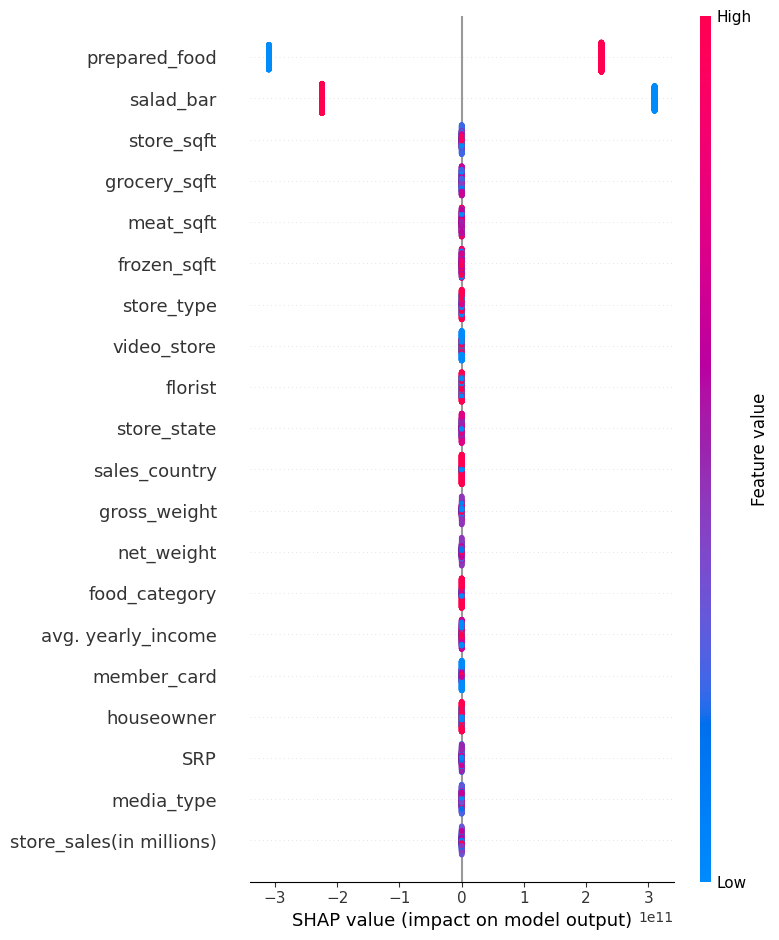

In [120]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_perturbation='interventional',feature_names=features.columns)
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

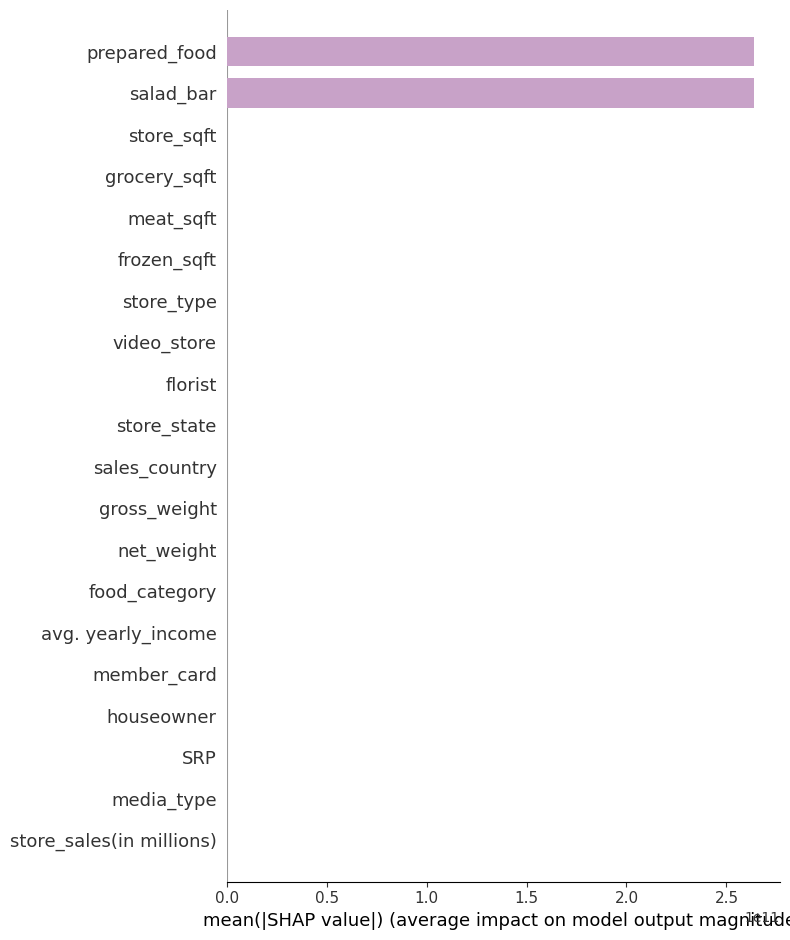

In [121]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='#C8A2C8')

### Observation

The prepared_food and salad_bar variable shows high importance than other features in predicting the cost feature

## 2. Tree Model - Shap Analysis

In [122]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

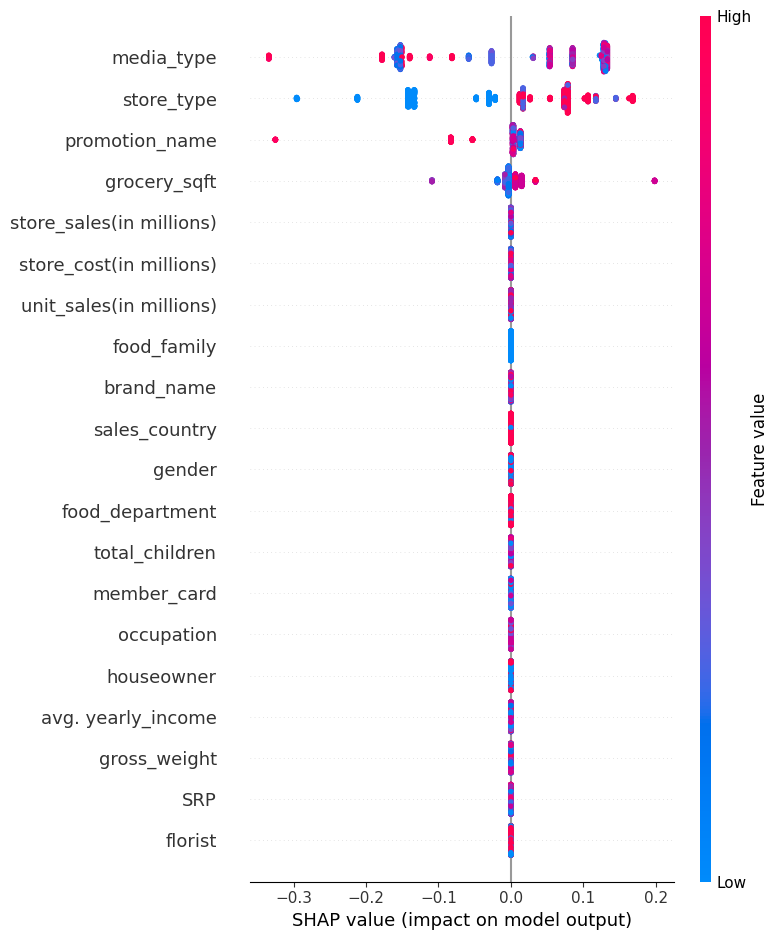

In [123]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

### Observation



The tree model suggests that media_type and store_type is more signifiacnt where in linear regression, store_sqft and grocery_sqft were the most significant features.

## 3. AutoML - Shap Analysis

AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                rmse       mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
----------------------------------  --------  --------  --------  ---------  ------------------------  ------------------  -------------------------  -------
GBM_2_AutoML_2_20240402_210453       3.4788    12.102    1.91921  0.0397052                   12.102                 3441                   0.071894  GBM
GBM_3_AutoML_2_20240402_210453       4.71139   22.1972   2.97996  0.0535677                   22.1972                2334                   0.131626  GBM
GBM_1_AutoML_2_20240402_210453       4.91447   24.1521   2.47397  0.0561577                   24.1521                9544                   0.166623  GBM
GBM_4_AutoML_2_20240402_210453       5.52963   30.5768   3.74297  0.0621755                   30.5768                2636                   0.07511   GBM
XGBoost_3_AutoML_2_20240402_210453   6.81346   46.4233   3.38412  0.0733738                   46.4233                5559                   0.021035  XGBoost
DRF_1_AutoML_2_20240402_210453       7.01898   49.2661   4.53118  0.078717                    49.2661                4543                   0.047227  DRF
XGBoost_2_AutoML_2_20240402_210453   7.95371   63.2615   4.93823  0.0845148                   63.2615                1910                   0.025     XGBoost
XGBoost_1_AutoML_2_20240402_210453  10.9934   120.856    7.35562  0.120507                   120.856                13761                   0.027508  XGBoost
XRT_1_AutoML_2_20240402_210453      15.8639   251.663   13.0327   0.169778                   251.663                 4863                   0.070431  DRF
GLM_1_AutoML_2_20240402_210453      23.8129   567.056   19.6615   0.260281                   567.056                  777                   0.004679  GLM
[10 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

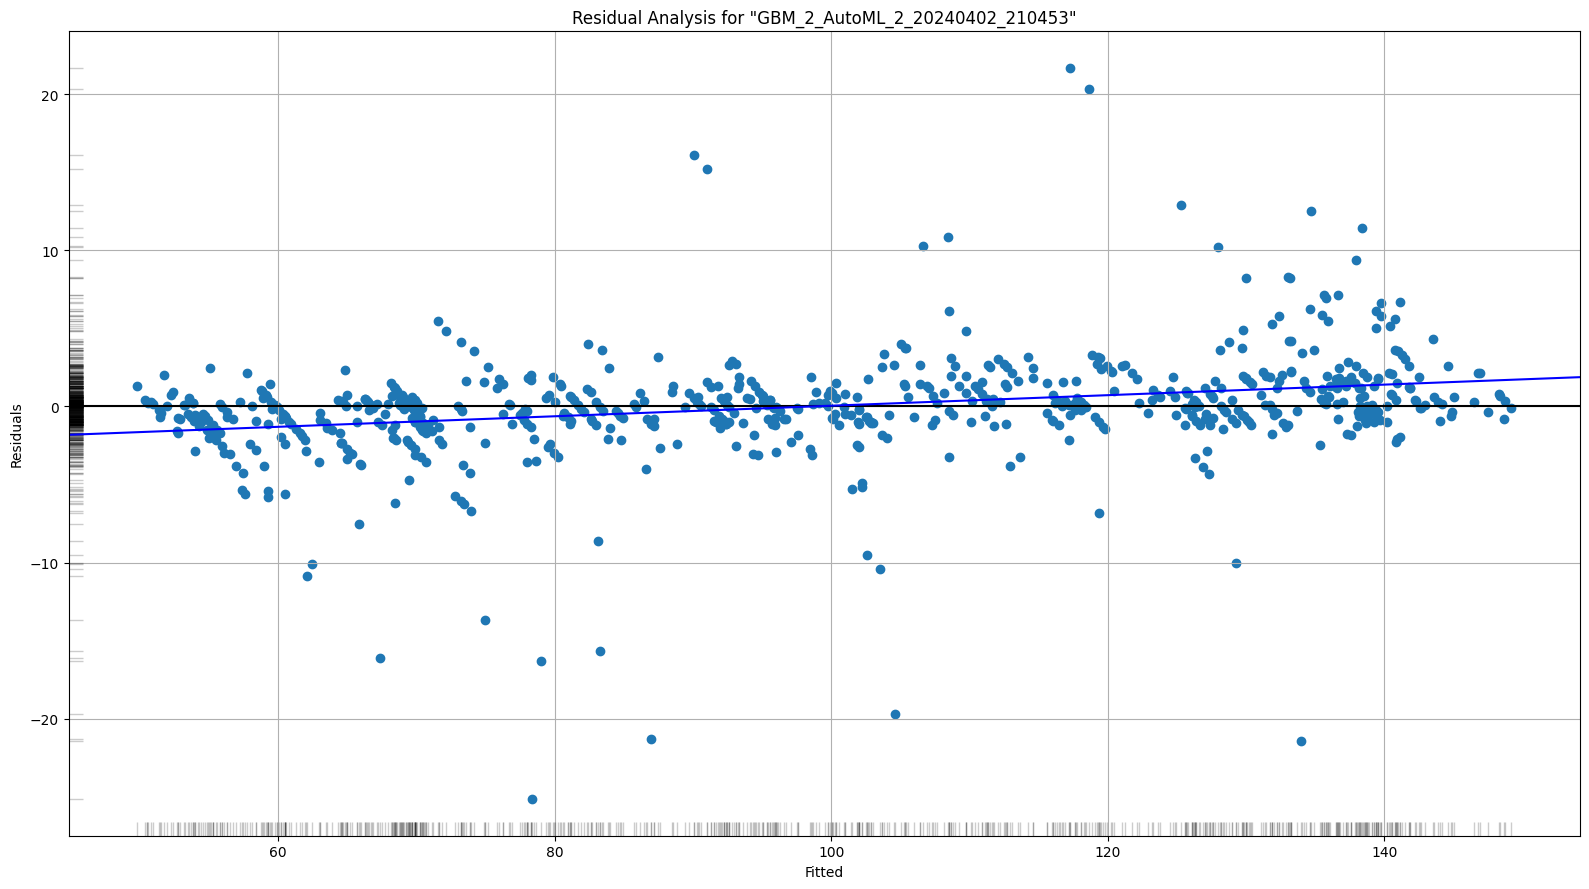

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

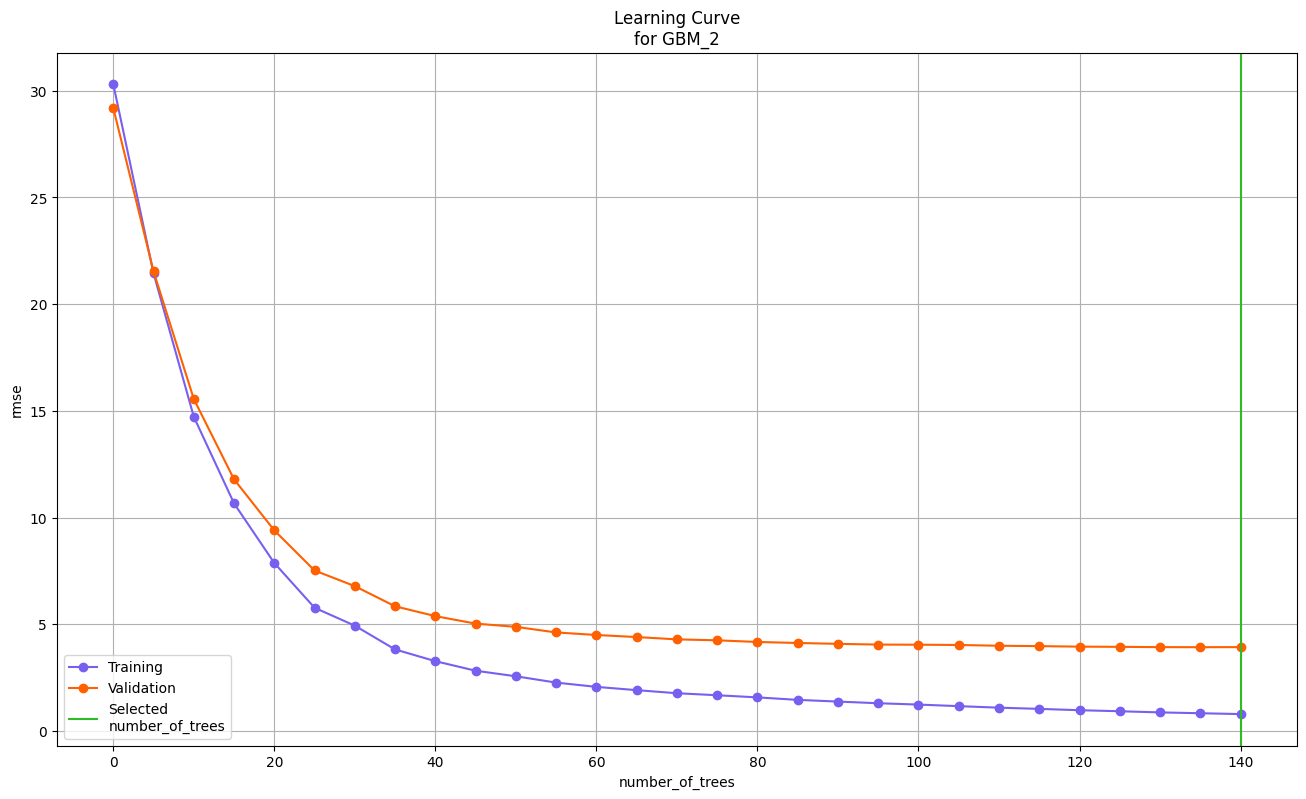

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

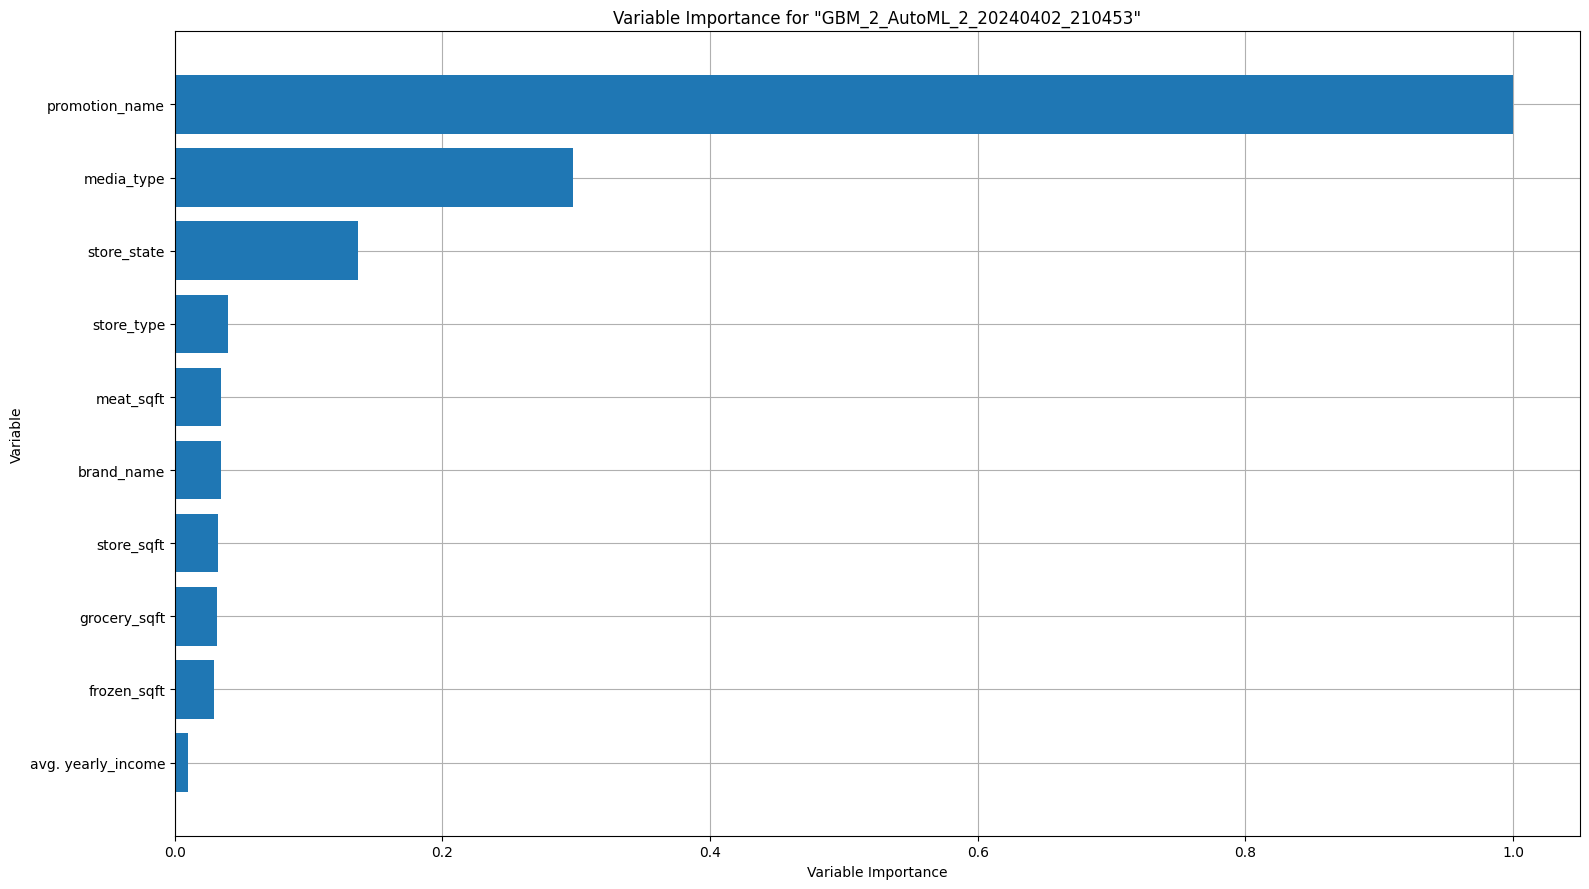

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

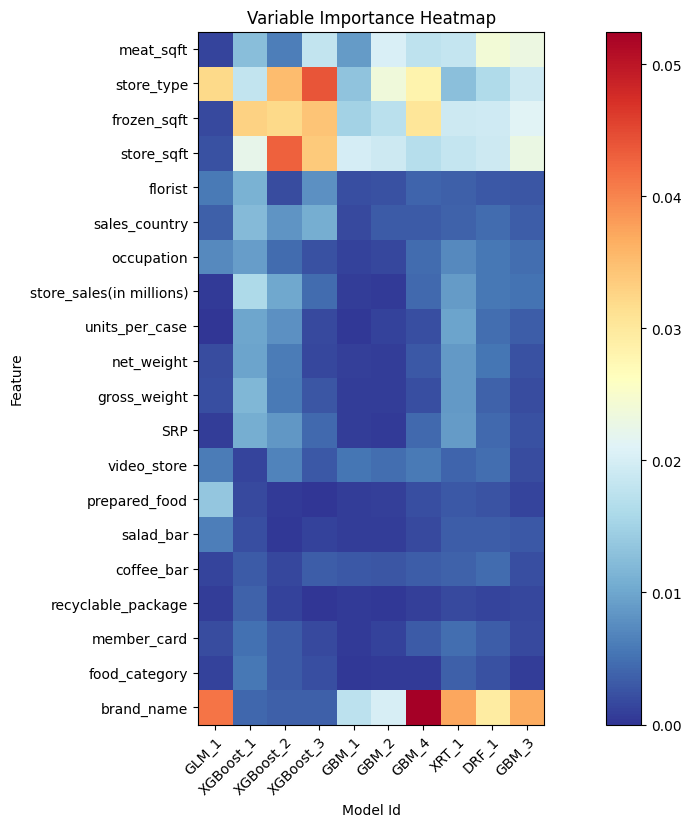

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

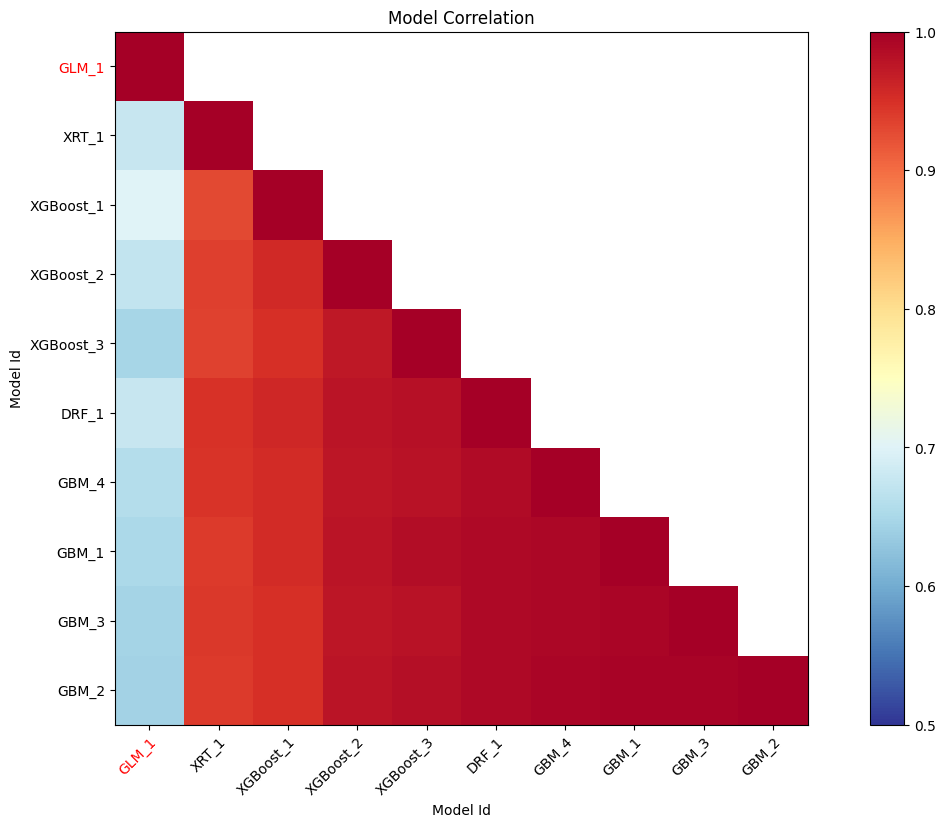

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

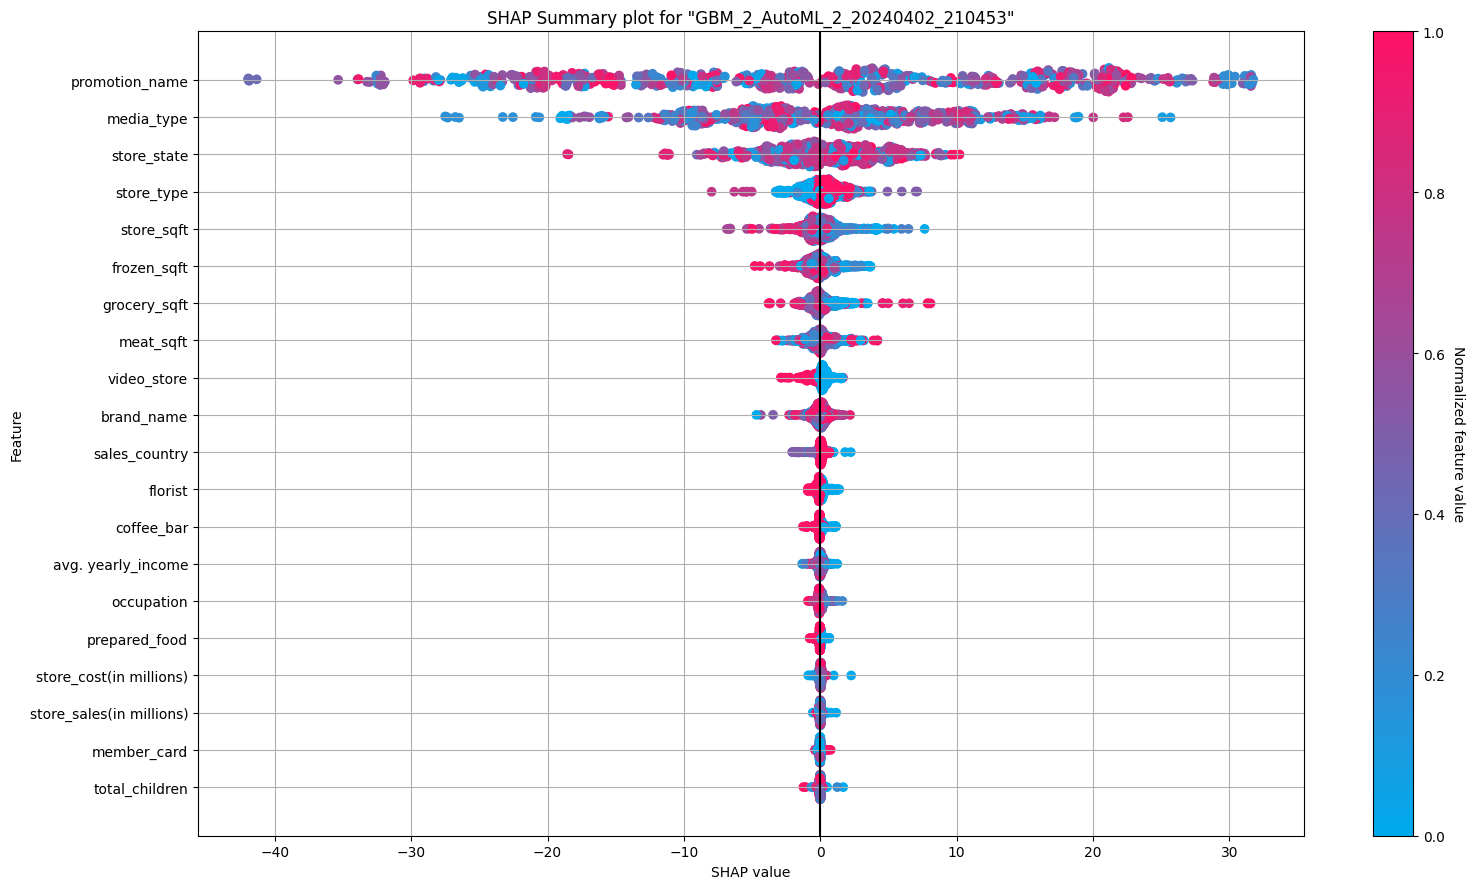

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

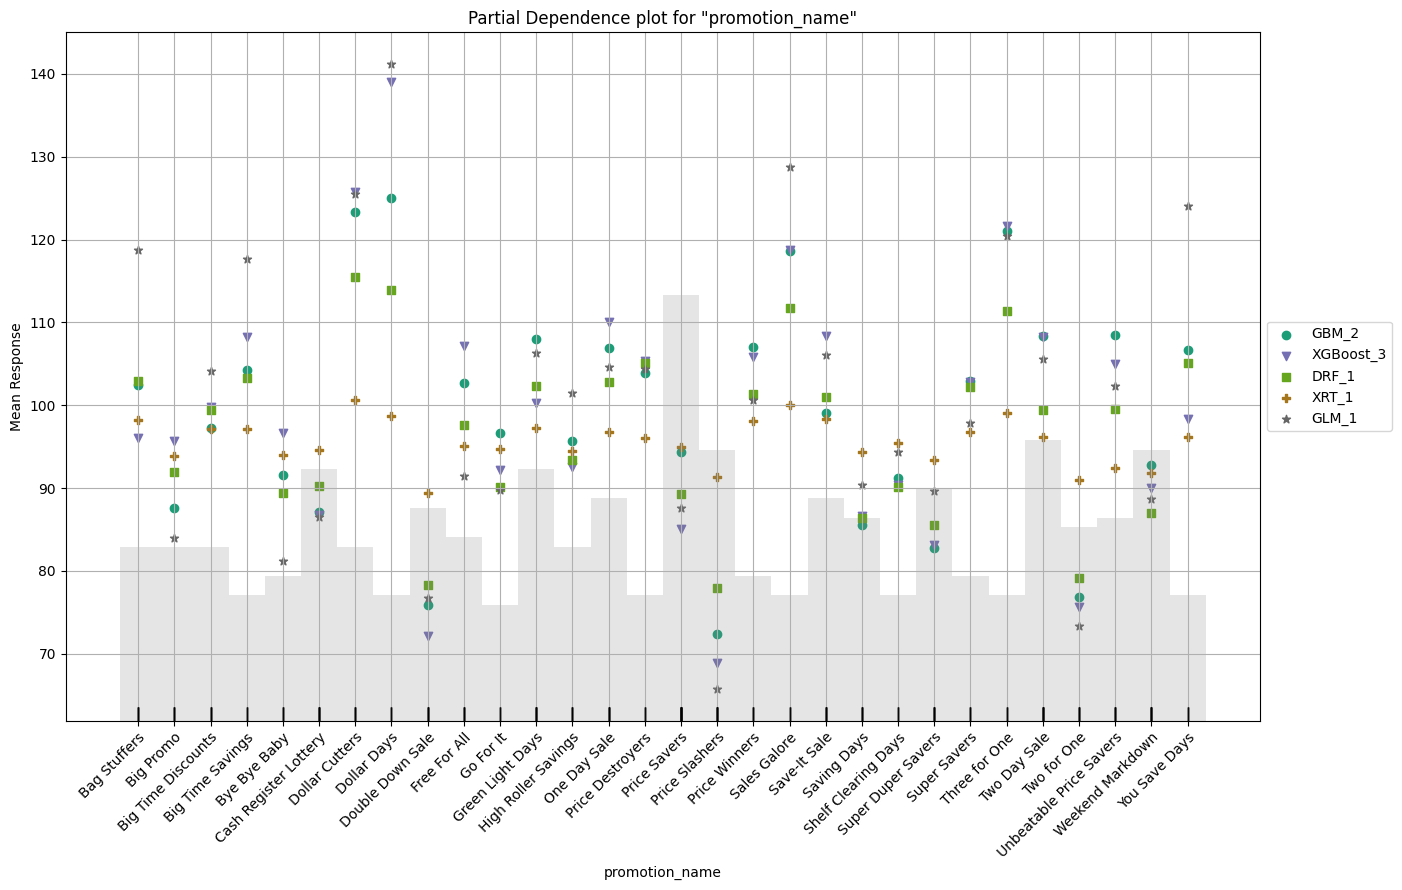

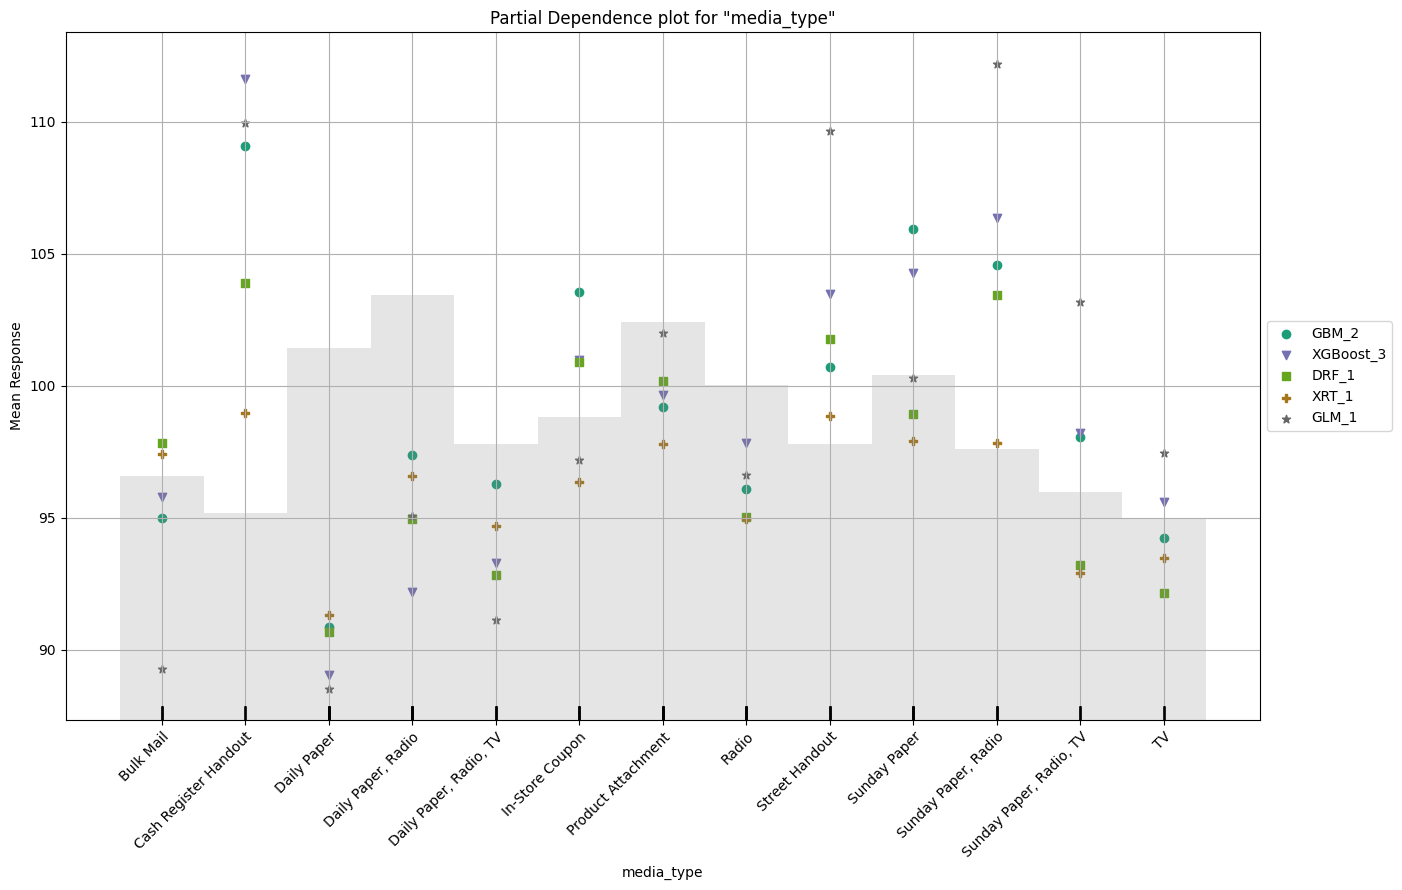

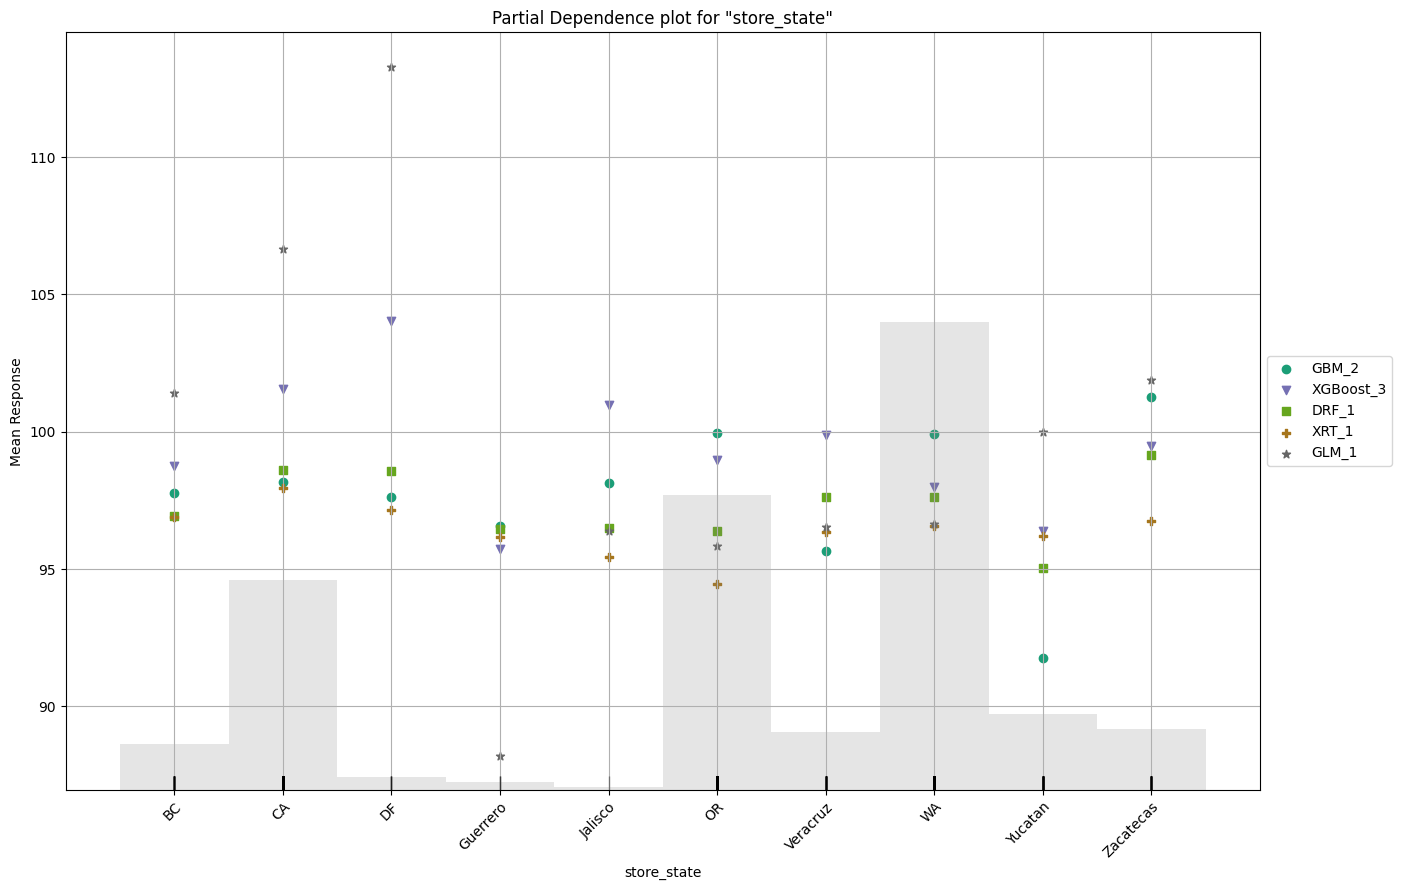

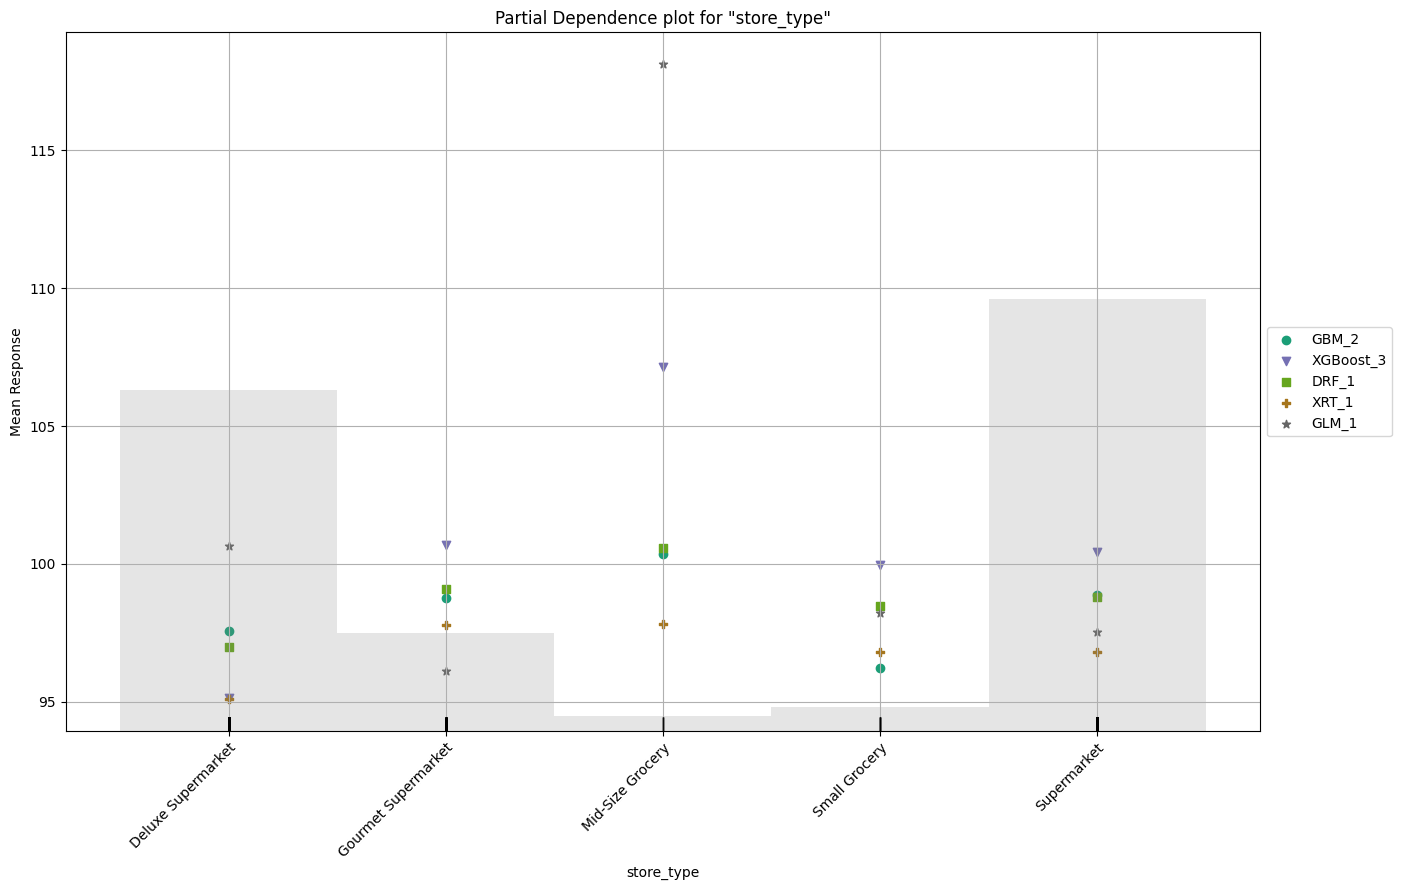

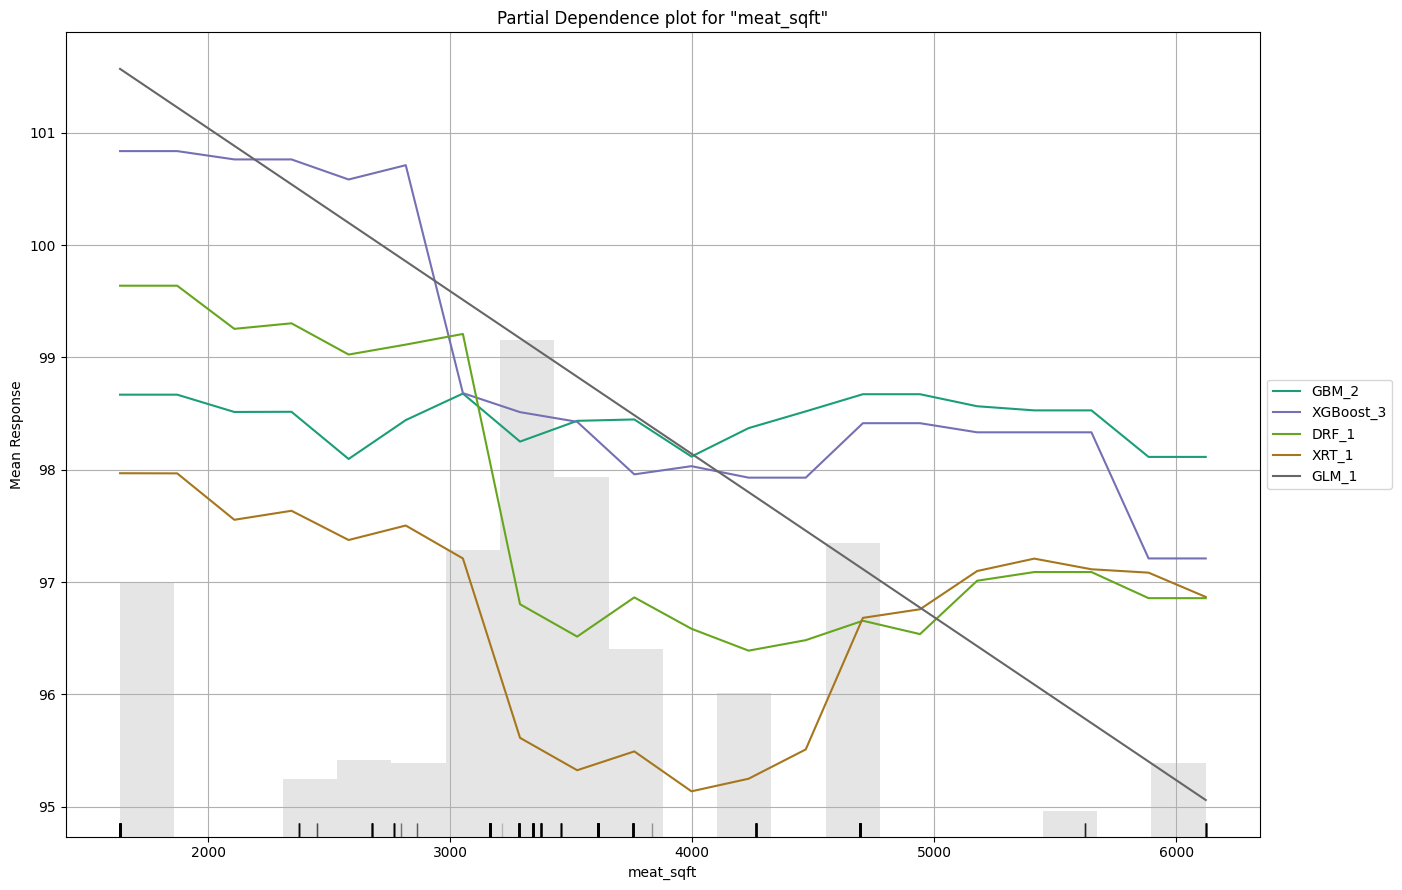

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

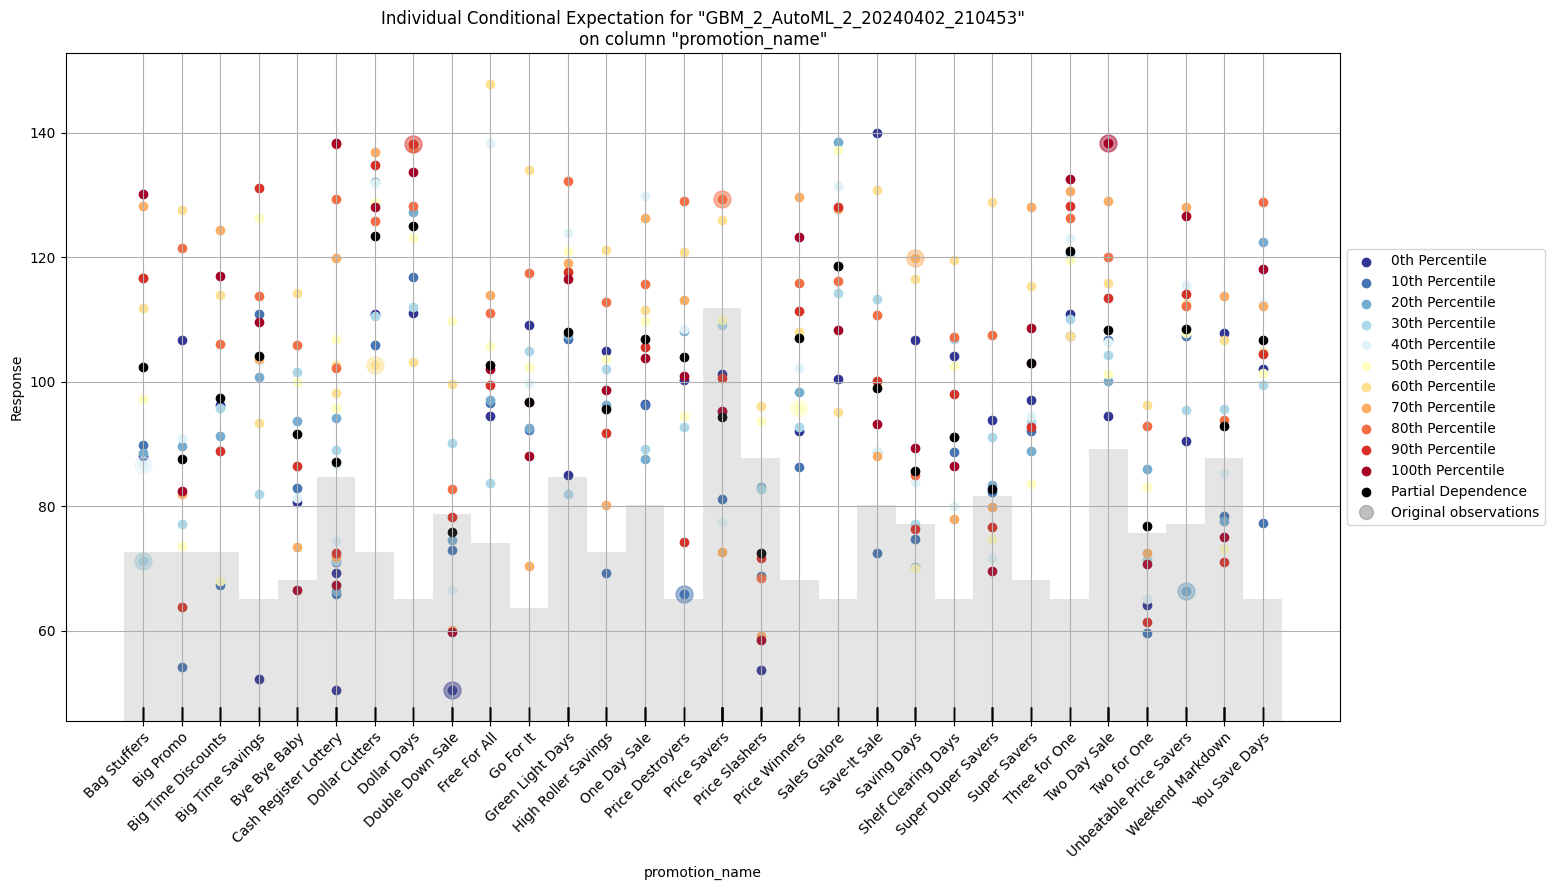

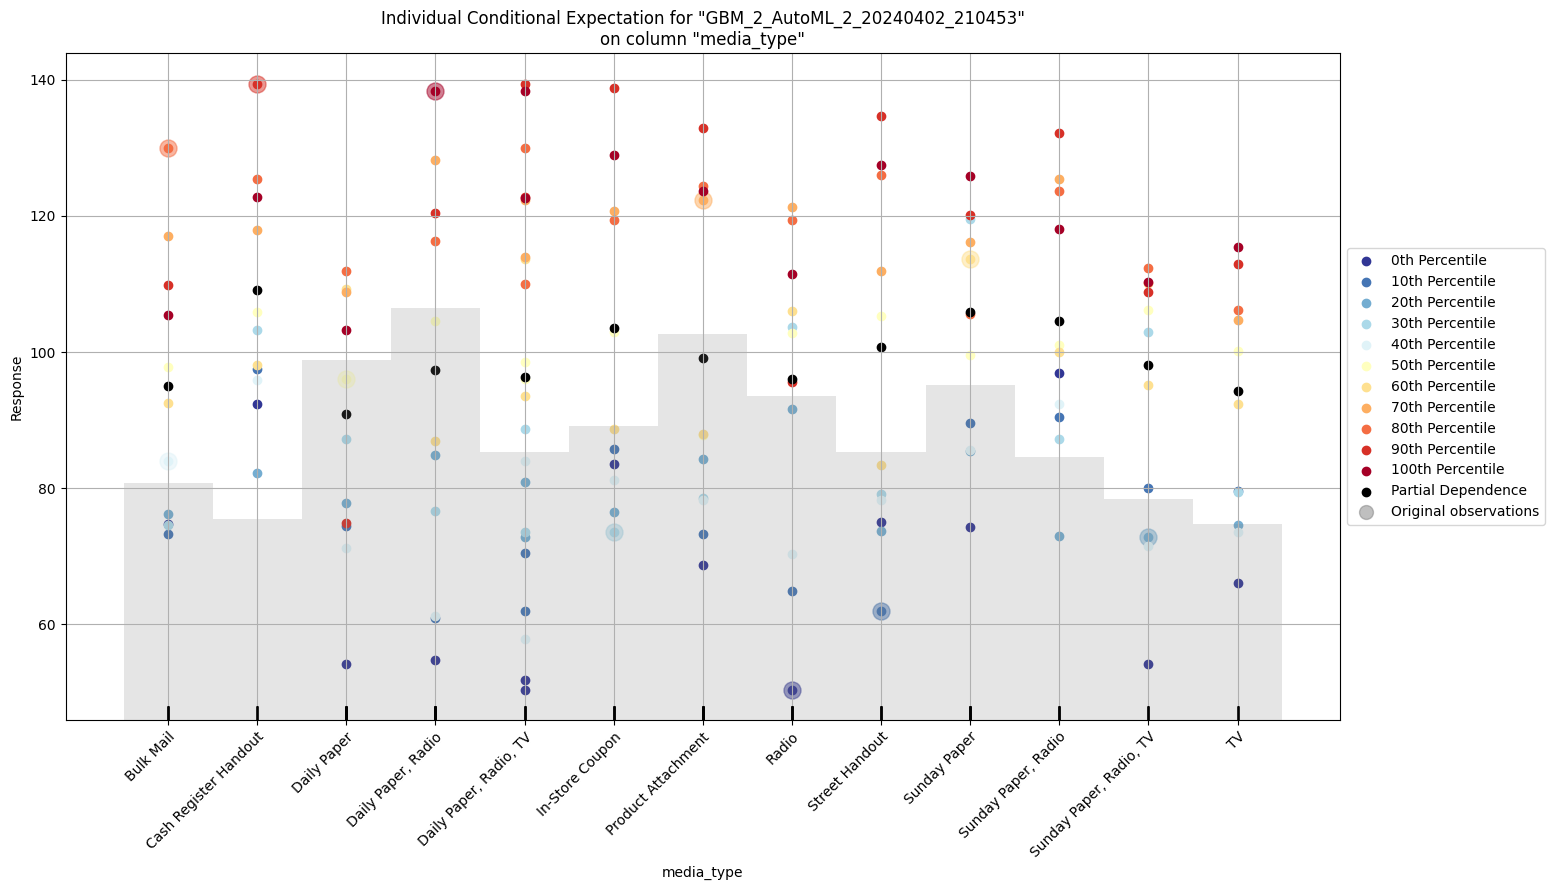

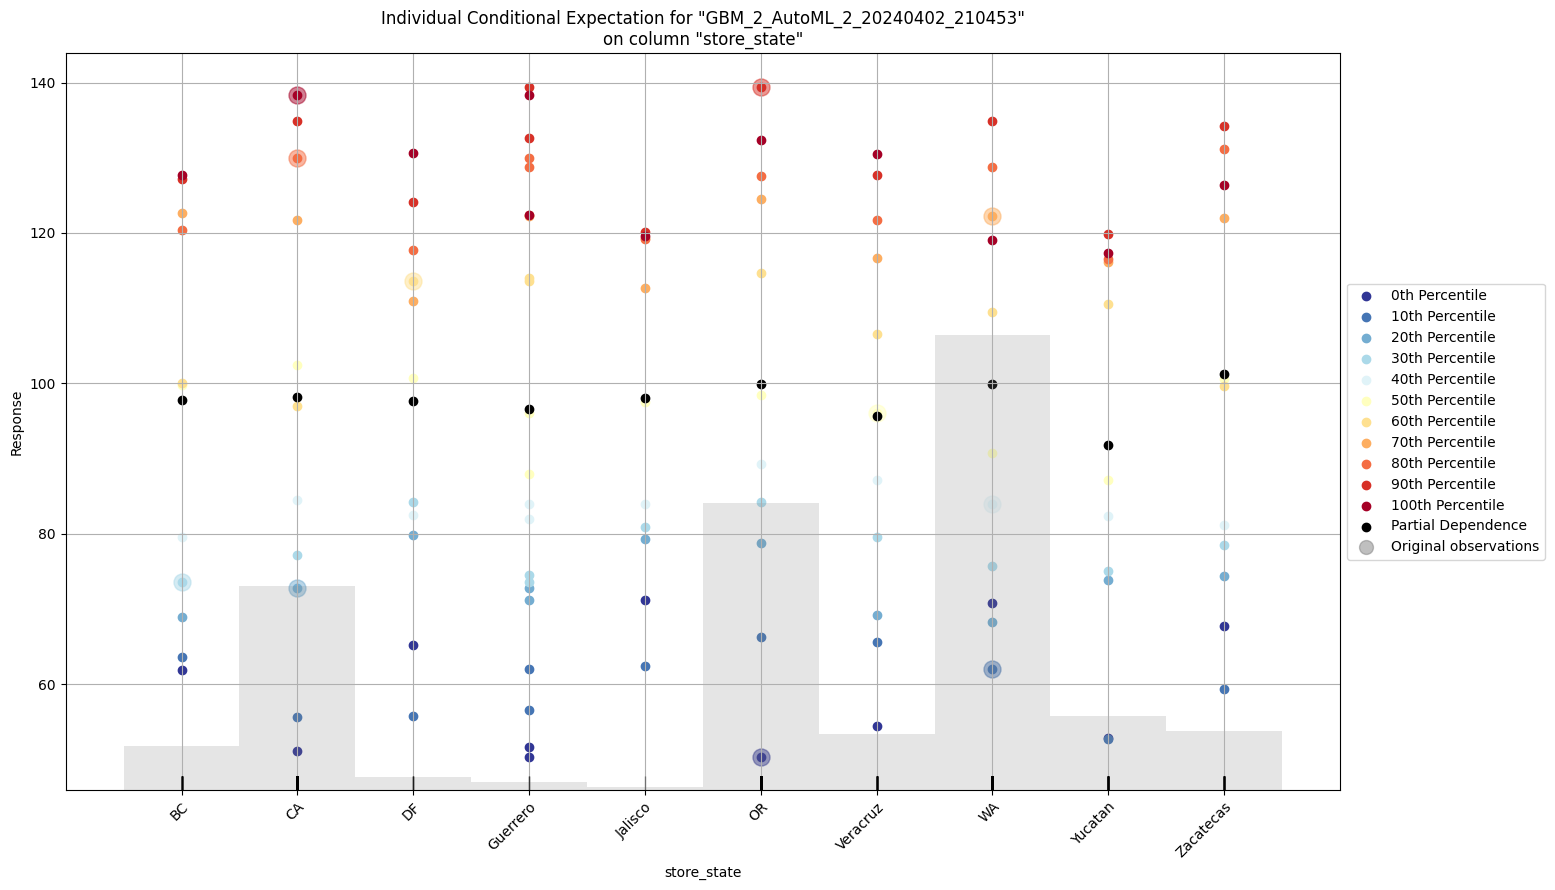

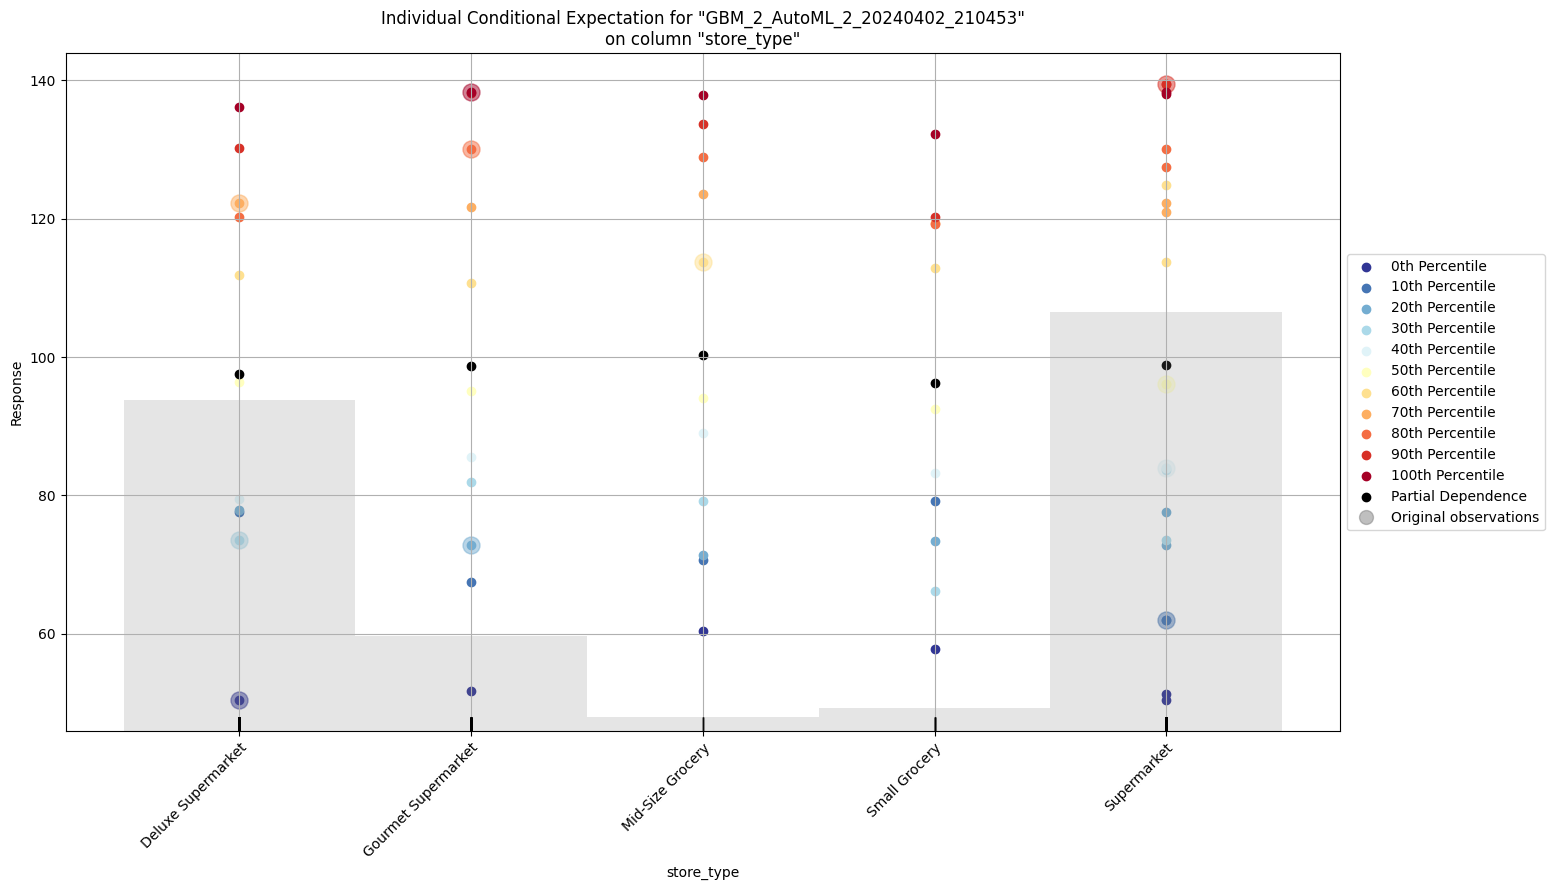

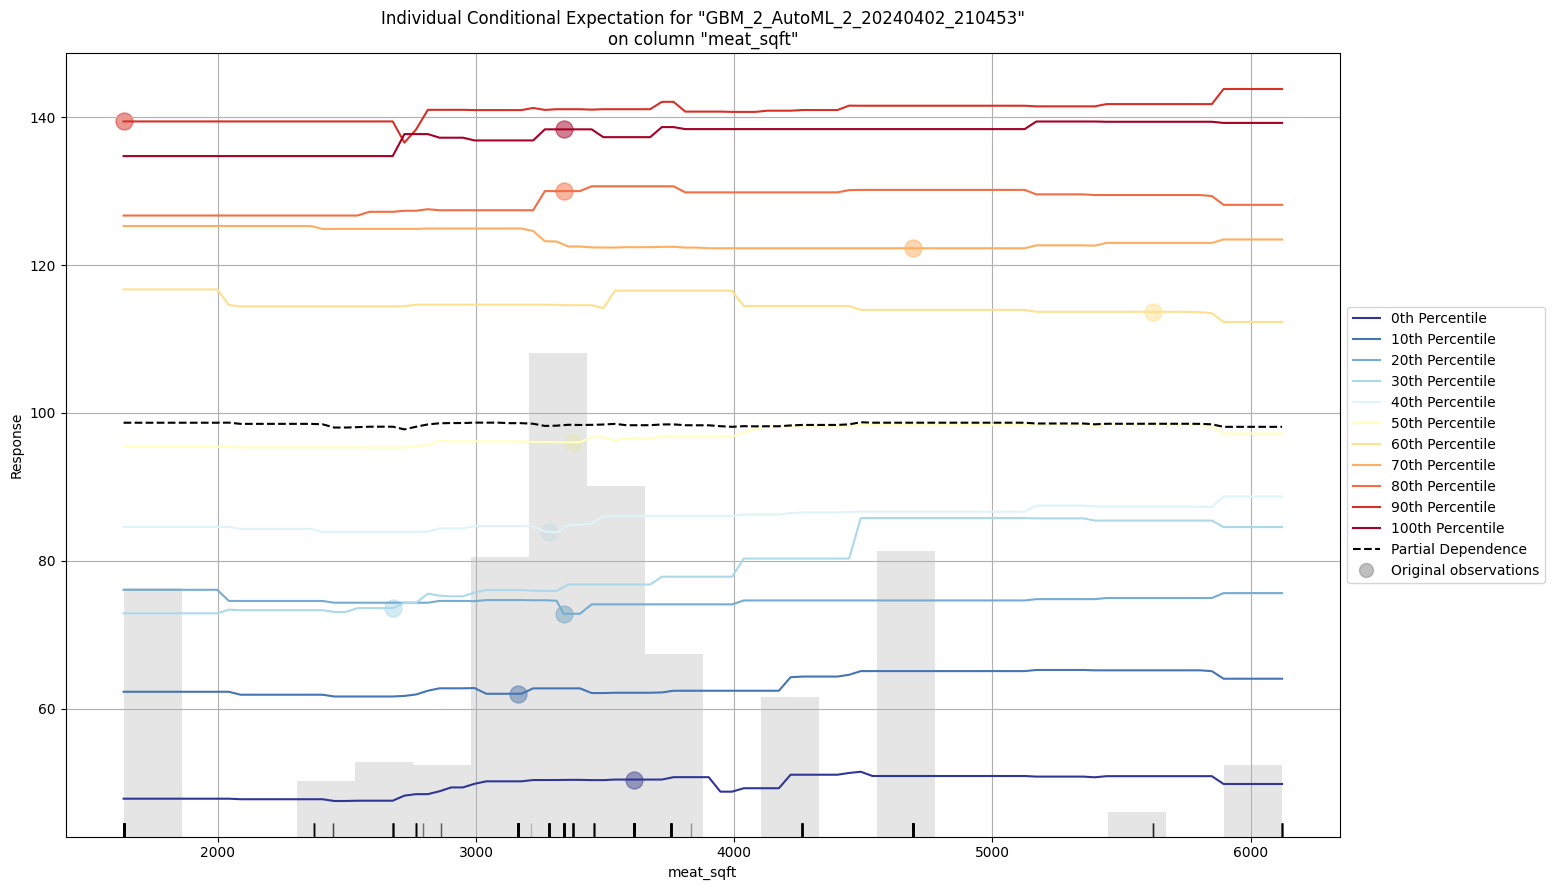

In [124]:
exm = aml.explain(test)

### Observations

- From Variable importance graph: promotion_name shows high importance in predicting the target varible cost. Its very high showing colinearity
- From Shap Analysis:
  Expect promotion_name and media_type, other features doesn't show high variation in the impact on target variable

# **Conclusion**

From above analysis (what I learnt):

- The dataset contains both numeric and categorical types.
- 'store_sales' and 'store_sqft' present significant outliers, which are addressed later for better results. 'credit_score' has few outliers.
- There are no missing values in the dataset.
- All features have been scaled to a range between 0 and 1 using MinMaxScaler, Normalization, and Standardization for uniformity.
- Some features were highly correlated, identified through multi-collinearity analysis, and were removed based on permutation importance evaluations.
- A noticeable variation in model performance was observed when comparing scenarios with and without outlier treatment.
- For the linear model, SHAP analysis yielded insights consistent with those from other feature importance methods like OLS regression.
- In tree-based models, the conclusions drawn from feature importance and SHAP analysis align closely, though they diverge slightly from those in linear modeling when examining the same target variable.
- SHAP values provide a granular understanding of how a feature impacts the prediction for an individual record, showcasing the distribution of the 'cost' variable at specific points across different models.
- In tree-based models, 'promotion_name' and 'media_type' emerged as highly influential on the 'cost', whereas other models highlighted 'store_sqft' and 'prepared_food' as key predictors above others.

# **References**

- H2O.ai documentation https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
- H2O.ai notebook reference on a different dataset for classification https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=vOxeivTyUCeq
- H2O.ai model explainability https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
- Shap Analysis is refered from https://www.analyticsvidhya.com/blog/2021/11/model-explainability/
- Dataset- https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart




# **LICENSE**

MIT License

Copyright (c) 2024 Suhasini Polampelly

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

